In [108]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [118]:
#load area csv
area_data=pd.read_csv(r'c:/users/91991/desktop/AREA.csv')
area_data

,STATE/UT,AREA(KM/SQUARE)
0,Andaman and Nicobar Islands,8249
1,Andhra Pradesh,162975
2,Arunachal Pradesh,83743
3,Assam,78348
4,Bihar,94163
5,Chandigarh,114
6,Chhattisgarh,135192
7,Delhi,1484
8,Goa,3702
9,Gujarat,196024


In [22]:
# Load data
crime_data = pd.read_csv(r"c:\users\91991\downloads\India_Crime -Zip\India_Crime - Copy\01_District_wise_crimes_committed_IPC_2001_2012.csv")
literacy_data = pd.read_csv(r"c:/users/91991/downloads/literacy rate.csv")
print(crime_data.columns)
print("Columns in 2nd are")
print(literacy_data.columns)
# Merge datasets on State/UT
# Standardize the 'STATE/UT' column
crime_data['STATE/UT'] = crime_data['STATE/UT'].str.strip().str.upper()
literacy_data['STATE/UT'] = literacy_data['STATE/UT'].str.strip().str.upper()
data = pd.merge(crime_data, literacy_data, on="STATE/UT", how="inner")
print(data)


Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')
Columns in 2nd are
Index(['STATE/UT', '2000-01-INC', '2011-12-INC', '2001 - LIT', '2011- LIT',
       '2001 - POP', '2011- POP', '2001 -SEX_Ratio', '2011 -SEX_Ratio',

# PHASE 1 DATA COLLECTION/PREPARATION PART

IN THIS DATA COLLECTION PART FIRST I HAVE DONE THOUGH ANALYSIS  FROM THE FILE CRIME_INDIA ZIP FILE THAT HAS BEEN SENT TO US. I HAVE COMPILED ALL THE DATA THE COLUMNS THAT WE CAN USE FOR THE ANALYSIS OF STATE/UT,YEAR,TYPES OF CRIMES.EXCEL FILE THAT I HAVE MADE FOR ANALYSIS I WILL BE SHARING THAT CSV IN THE GITHUB LINK.

FOR LITERACY RATE CSV- I GOT THAT DATA DOWNLOADED FROM KAGGLE FOR WHICH I AM SHARING THE LINK
https://www.kaggle.com/code/karankamat/state-wise-distribution/input
IN THIS CSV I GOT THE STATE ,LIT 2001,LIT 2011, POP 2001, POP 2011 ALL THESE COLUMNS I NEED FOR ANALYSIS OF MY DATA    

FOR THE AREA CSV- SINCE NO CONDUCIVE DATA IS AVAILABLE SO I COPIED THE DATA FROM GOOGLE MADE AN EXCEL FILE ACCORDING TO THE REQUIREMENT OF MY ANALYSIS

2.1Analysis of Literacy Rate vs Total Crimes.
2.2Analysis of the type of crime vs each state vs Literacy rate.
2.3Analysis of year-on-year total crime rate.
2.5Analysis of Population vs overall Crime.
2.6Each state crime report. 
FOR THE ANALYSIS OF ALL THESE POINTS I MERGED LIERACY CSV AND 01_District_wise_crimes_committed_IPC_2001_2012 CSV AND DID ANALYSIS OF ALL THE POINTS MENTIONED ABOVE 


 2.4Analysis of area vs overall crime.
FOR DOING ANALYSIS OF AREA AND OVERALL CRIME I HAVE MERGED TWO CSV AREA CSV AND 01_District_wise_crimes_committed_IPC_2001_2012    

# PHASE 2 STATE/UT WISE ANALYSIS

In [23]:
data.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,2001 - LIT,2011- LIT,2001 - POP,2011- POP,2001 -SEX_Ratio,2011 -SEX_Ratio,2001 -UNEMP,2011 -UNEMP,2001 -Poverty,2011 -Poverty
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,60.47,67.02,76210,84581,978,993,8,12,15.77,9.2
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,60.47,67.02,76210,84581,978,993,8,12,15.77,9.2
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,60.47,67.02,76210,84581,978,993,8,12,15.77,9.2
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,60.47,67.02,76210,84581,978,993,8,12,15.77,9.2
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,60.47,67.02,76210,84581,978,993,8,12,15.77,9.2


# EXPLORATORY DATA ANALYSIS

# data.info()


In [24]:
data.describe 

<bound method NDFrame.describe of             STATE/UT       DISTRICT  YEAR  MURDER  ATTEMPT TO MURDER  \
0     ANDHRA PRADESH       ADILABAD  2001     101                 60   
1     ANDHRA PRADESH      ANANTAPUR  2001     151                125   
2     ANDHRA PRADESH       CHITTOOR  2001     101                 57   
3     ANDHRA PRADESH       CUDDAPAH  2001      80                 53   
4     ANDHRA PRADESH  EAST GODAVARI  2001      82                 67   
...              ...            ...   ...     ...                ...   
8387      PUDUCHERRY     PUDUCHERRY  2011      32                 20   
8388      PUDUCHERRY          TOTAL  2011      32                 22   
8389      PUDUCHERRY       KARAIKAL  2012       5                  6   
8390      PUDUCHERRY     PUDUCHERRY  2012      24                 21   
8391      PUDUCHERRY          TOTAL  2012      29                 27   

      CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
0                           

In [25]:
data.shape

(8392, 45)

In [26]:
data.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES',
       '2000-01-INC', '2011-12-INC', '2001 - LIT', '2011- LIT', '2001 - POP',
       '2011- POP', '2001 -SEX_Ratio', '2011 -SEX_Ratio', '2001 -UNEMP',
       '2011 -UNEMP', '2001 -Poverty',

# GRAPHICAL REPRESENTATION OF LITERACY RATE

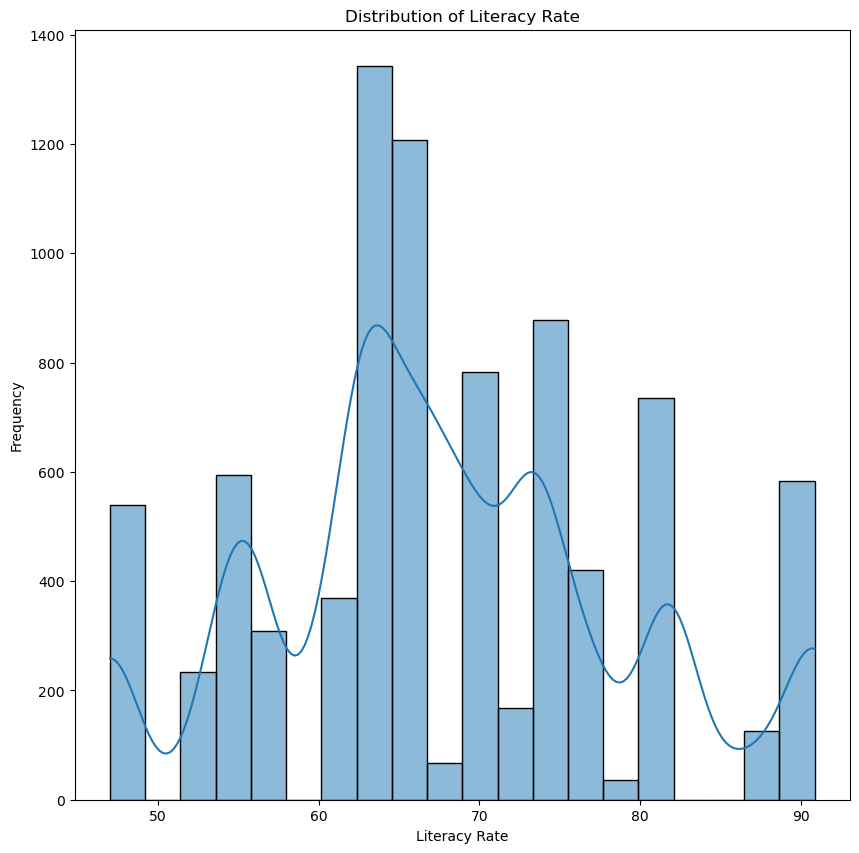

In [29]:
plt.figure(figsize=(10, 10))
sns.histplot(data['2001 - LIT'], bins=20, kde=True)
plt.title('Distribution of Literacy Rate')
plt.xlabel('Literacy Rate')
plt.ylabel('Frequency')
plt.show()

THE HISTOGRAM SHOWS THAT IN 2001 LITERACY RATE RANGES IN THE RANGE OF 60-70

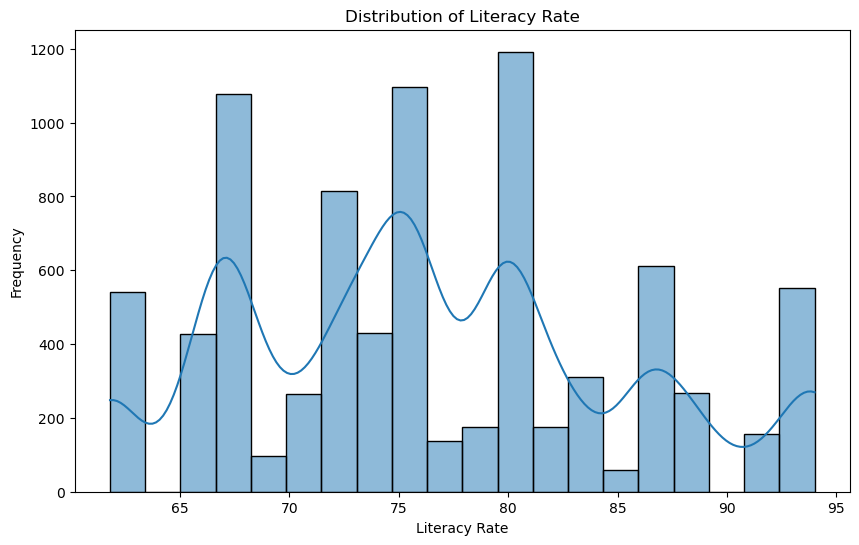

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(data['2011- LIT'], bins=20, kde=True)
plt.title('Distribution of Literacy Rate')
plt.xlabel('Literacy Rate')
plt.ylabel('Frequency')
plt.show()

THE HISTOGRAM SHOWS THAT THE LITERACY RATE RANGES BETWEEN 65-85 WITH THE MAJORITY OD DATA BETWEEN 70 AND 80.FROM THIS WE CAN SEE THAT IN2011 LITERACY RATE IS HIGH WITH MOST OF THE POPULATION HAVING LITERACY RATE BETWEEN 70 AND 80 WHICH IS HIGHER THAN YEAR 2001.

# GRAPHICAL RELATIONSHIP SHOWING LITERACY AND TOTAL IPC CRIMES

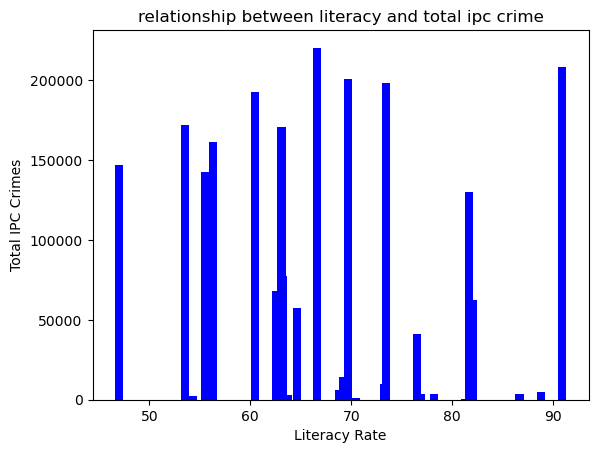

In [31]:
x=data['2001 - LIT']
y=data['TOTAL IPC CRIMES']
plt.bar(x,y,color='blue')
plt.xlabel('Literacy Rate')
plt.ylabel('Total IPC Crimes')
plt.title('relationship between literacy and total ipc crime')
plt.show()

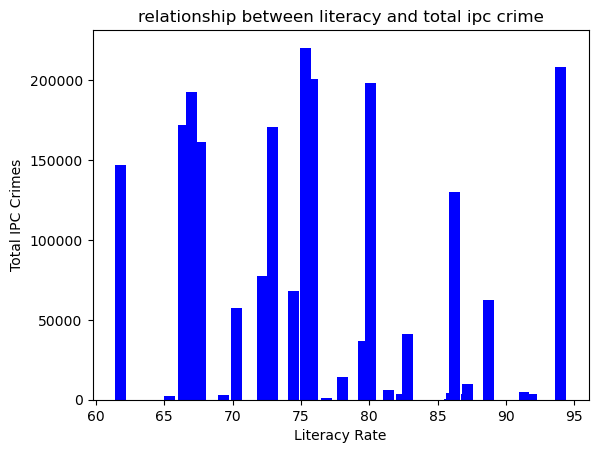

In [33]:
x=data['2011- LIT']
y=data['TOTAL IPC CRIMES']
plt.bar(x,y,color='blue')
plt.xlabel('Literacy Rate')
plt.ylabel('Total IPC Crimes')
plt.title('relationship between literacy and total ipc crime')
plt.show()

FROM THESE TWO BAR GRAPHS WE ARE COMPARING THE LITERACY RATES WITH TOTAL IPC CRIMES FOR THE YEAR 2001 AND 2011

IN BOTH THE YEARS THERE IS A NEGATIVE CORRELATION BETWEEN LITERACY RATES AND TOTAL IPC CRIMES . AS THE LITERACY RATE INCREASES TOTAL IPC CRIMES DECREASES

THE COMPARISON SUGGEST THAT WHILE THERE IS A NEGATIVE CORRELATION BETWEEN LITERACY RATE AND TOTAL IPC CRIMES,THE TOTAL IPC CRIMES HAVE INCREASED OVER TIME DESPITA AN INCREASE IN LITERACY RATE.THIS COULD BE DUE TO OTHER FACTORS SUCH AS ECONOMIC CONDITIONS,POPULATION GROWTH OR SOCIO FACTORS THAT MAY BE CONTRIBUTING TO INCREASE IN TOTAL IPC CRIME

# SCATTER PLOT SHOWING LITERACY RATE AND TOTAL IPC CRIMES

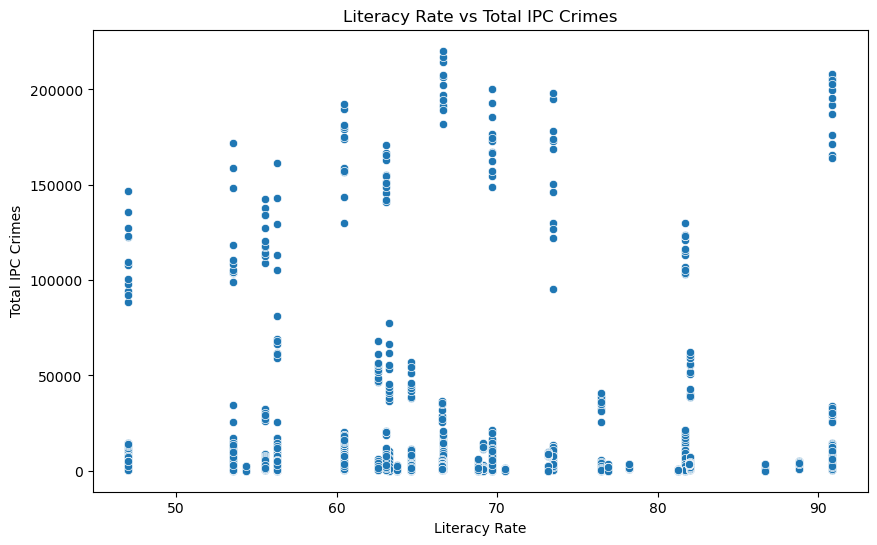

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='2001 - LIT', y='TOTAL IPC CRIMES', data=data)
plt.title('Literacy Rate vs Total IPC Crimes')
plt.xlabel('Literacy Rate')
plt.ylabel('Total IPC Crimes')
plt.show()

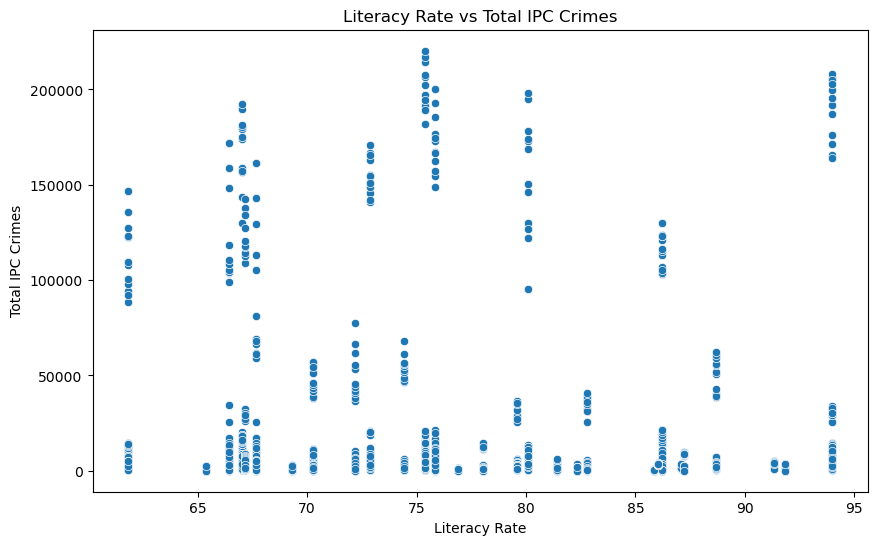

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='2011- LIT', y='TOTAL IPC CRIMES', data=data)
plt.title('Literacy Rate vs Total IPC Crimes')
plt.xlabel('Literacy Rate')
plt.ylabel('Total IPC Crimes')
plt.show()

# GRAPHICAL REPRESENTATION SHOWING LITERACY IN DIFFERENT STATES

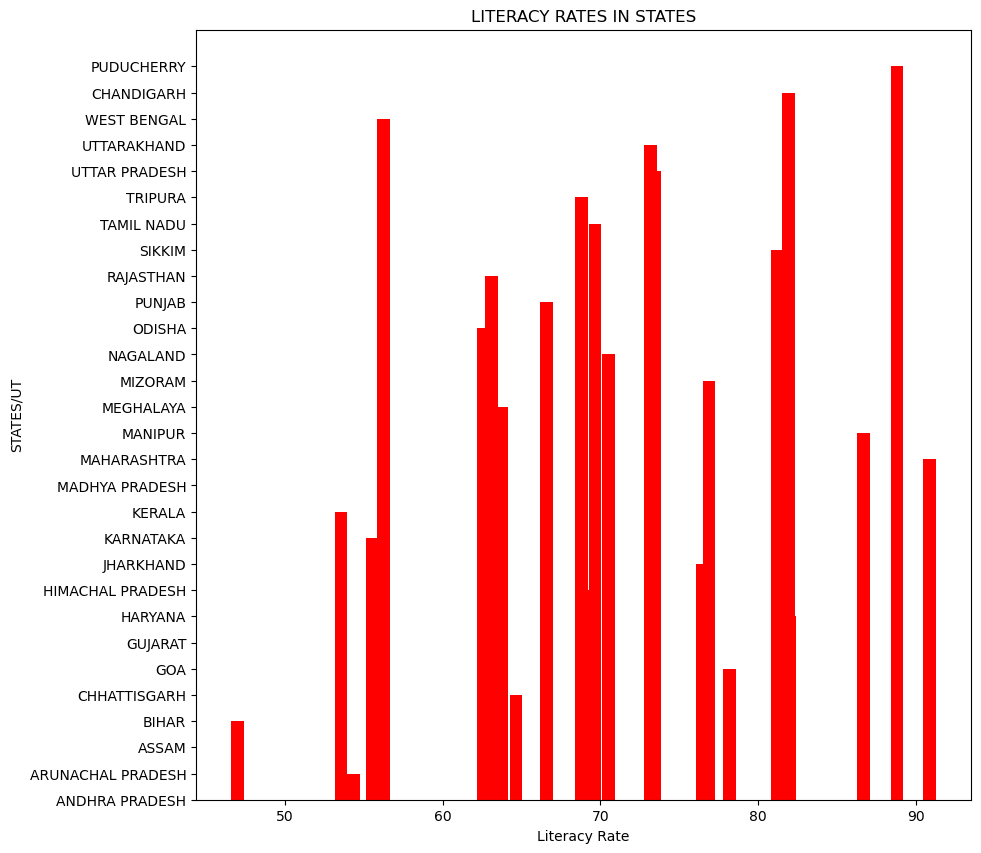

In [36]:
plt.figure(figsize=(10,10))
x=data['2001 - LIT']
y=data['STATE/UT']
plt.bar(x,y,color='red')
plt.xlabel('Literacy Rate')
plt.ylabel('STATES/UT')
plt.title('LITERACY RATES IN STATES')
plt.show()

IN 2001 HIGHEST LITERACY RATES ARE IN STATES PONDICHERRY, CHANDIGARH,WEST BENGAL FOLLOWED BY UTTRAKHAND
LOWEST LITERACY RATES ARE IN ARUNACHAL PRADESH AND BIHAR

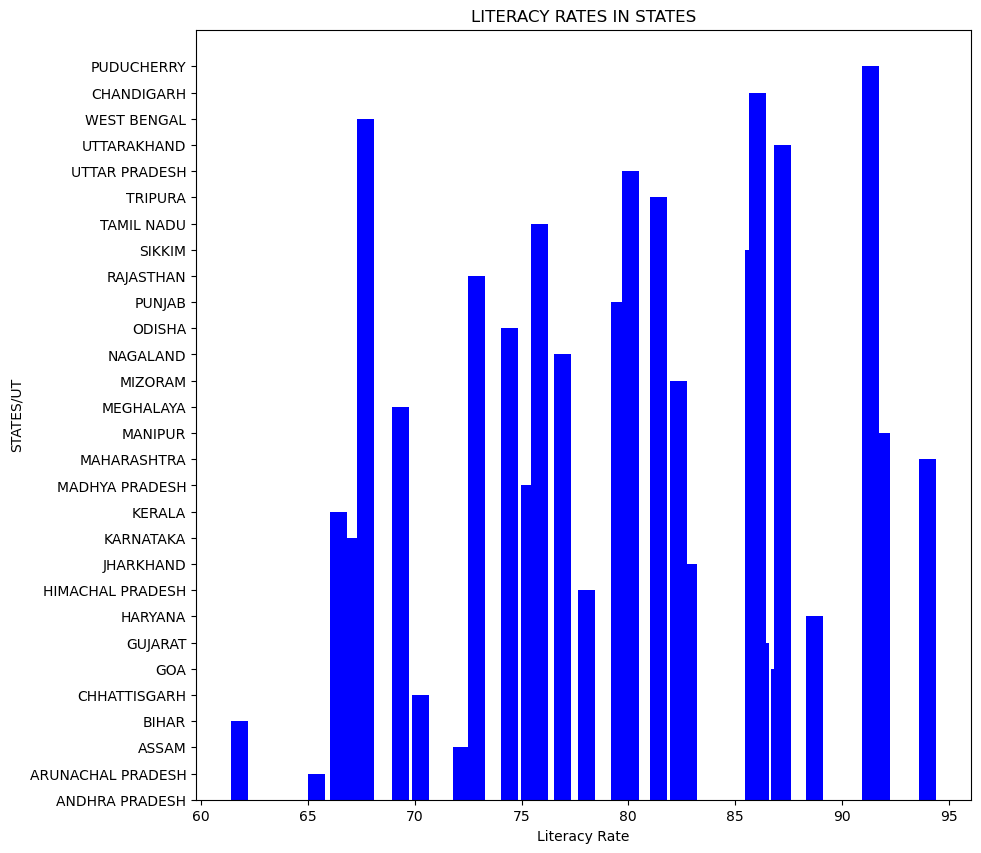

In [37]:
plt.figure(figsize=(10,10))
x=data['2011- LIT']
y=data['STATE/UT']
plt.bar(x,y,color='blue')
plt.xlabel('Literacy Rate')
plt.ylabel('STATES/UT')
plt.title('LITERACY RATES IN STATES')
plt.show()

FROM BOTH THE YEARS WE CAN SEE THAT THERE IS A WIDE VARIATION OF LITERACY RATES ACROSS DIFFERENT STATES AND UNION TERRITORIES WITH UNION TERRITORIES TEND TO HAVE HIGHER LITERACY RATES THAN THE STATES WITH CHANDIGARH HAVING HIGHEST LITERACY RATES IN BOTH THE YEARS COMPARATIVELY TO STATES

# GRAPHICAL REPRESENTATION SHOWING TOTAL IPC CRIMES IN EACH STATE

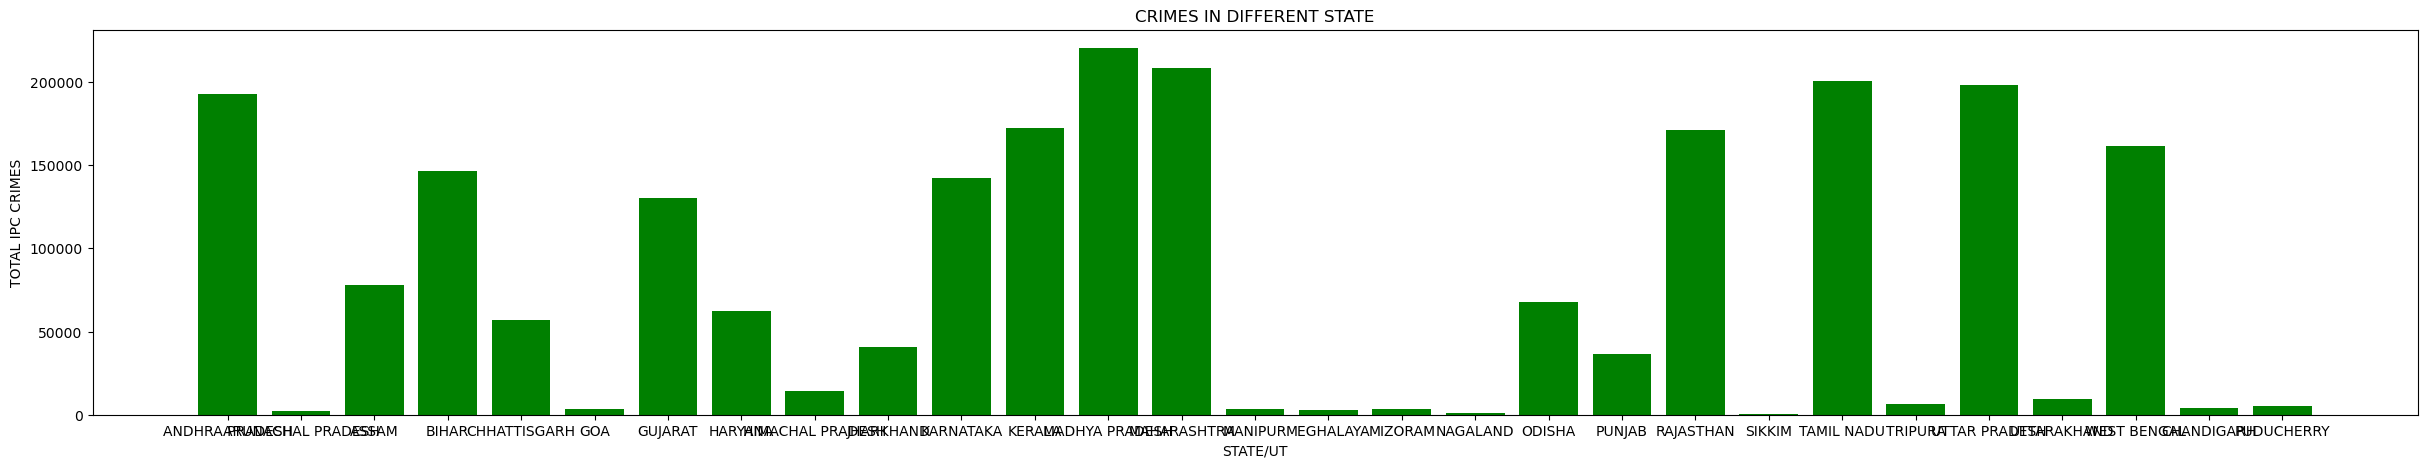

In [38]:
plt.figure(figsize=(30,5))
y=data['TOTAL IPC CRIMES']
x=data['STATE/UT']
plt.bar(x,y,color='green')
plt.xlabel('STATE/UT')
plt.ylabel('TOTAL IPC CRIMES')
plt.title('CRIMES IN DIFFERENT STATE')
plt.show()

# TOTAL IPC CRIMES ARE HIGHER IN THE STATES OF ANDHRA PRADESH,BIHAR,MADHYA PRADESH,MAHARASHTRA,TAMIL NADU,UTTAR PRADESH,WEST BENGAL

ANALYSIS OF CRIME VS EACH STATE VS LITERACY RATE

FROM THE ABOVE BAR PLOTS WE CAN CONCLUDE THAT THE STATES IN WHICH THERE ARE HIGHER LITERACY RATES LIKE PONDICHERRY,CHANDIGARH AND UTTRAKHAND HAVE LOW CRIME RATE

ON THE CONTRARY THE STATES WHICH HAVE LOW LITERACY RATES LIKE BIHAR,ANDHRAPRADESH,MADHYA PRADESH,UTTAR PRADESH HAVE HIGHER CRIME RATE

TO CONCLUDE CRIME RATE IS NEGATIVELY CORRELATED WITH LITERACY RATE

# GRAPHICAL REPRESENTATION OF POPULATION AND OVERALL CRIME

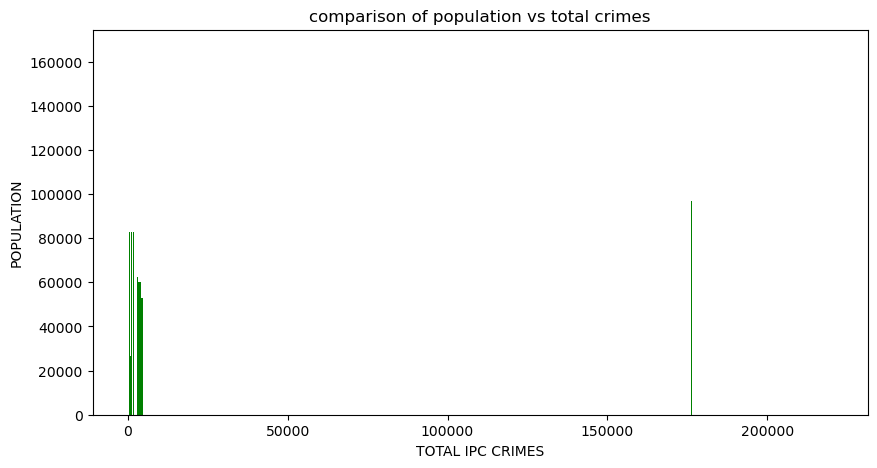

In [39]:
plt.figure(figsize=(10,5))
x=data['TOTAL IPC CRIMES']
y=data['2001 - POP']
plt.bar(x,y,color='green')
plt.xlabel('TOTAL IPC CRIMES')
plt.ylabel('POPULATION')
plt.title('comparison of population vs total crimes')
plt.show()

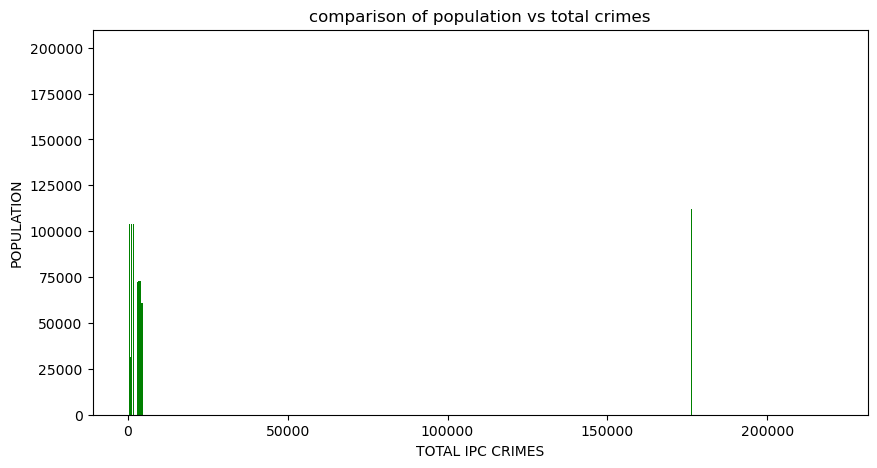

In [40]:
plt.figure(figsize=(10,5))
x=data['TOTAL IPC CRIMES']
y=data['2011- POP']
plt.bar(x,y,color='green')
plt.xlabel('TOTAL IPC CRIMES')
plt.ylabel('POPULATION')
plt.title('comparison of population vs total crimes')
plt.show()

FROM THE ABOVE BAR CHARTS OF TWO YEARS POPULATION 2001 AND 2011 WE CAN SEE THAT THERE IS A POSITIVE CORRELATION BETWEEN POPULATION INCREASE AND TOATL IPC CRIME

WHEN THERE IS AN INCREASE IN POPULATION THERE IS A SPIKE IN TOTAL IPC CRIMES

# POPULATION VS LITERACY RATE

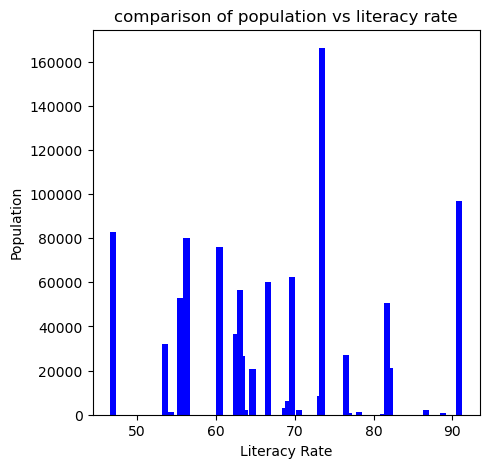

In [41]:
plt.figure(figsize=(5,5))
x=data['2001 - LIT']
y=data['2001 - POP']
plt.bar(x,y,color='blue')
plt.xlabel('Literacy Rate')
plt.ylabel('Population')
plt.title('comparison of population vs literacy rate')
plt.show()

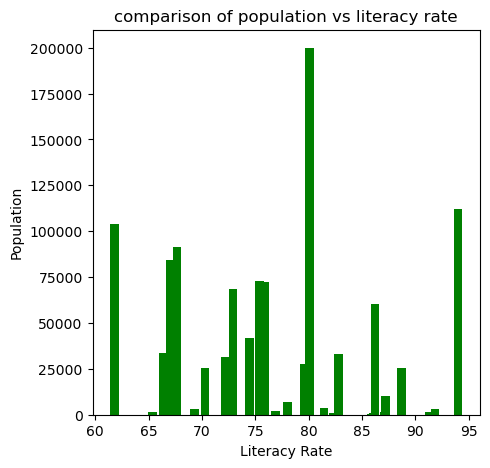

In [42]:
plt.figure(figsize=(5,5))
x=data['2011- LIT']
y=data['2011- POP']
plt.bar(x,y,color='green')
plt.xlabel('Literacy Rate')
plt.ylabel('Population')
plt.title('comparison of population vs literacy rate')
plt.show()

FROM THE ABOVE WE CAN CONCLUDE THAT AS MUCH AS THERE IS AN INCREASE IN POPULATION RATE THERE IS NOT MUCH INCREASE IN LITERACY RATE

# GRAPHICAL REPRESENTATION OF YEAR ON YEAR TOTAL CRIME RATE

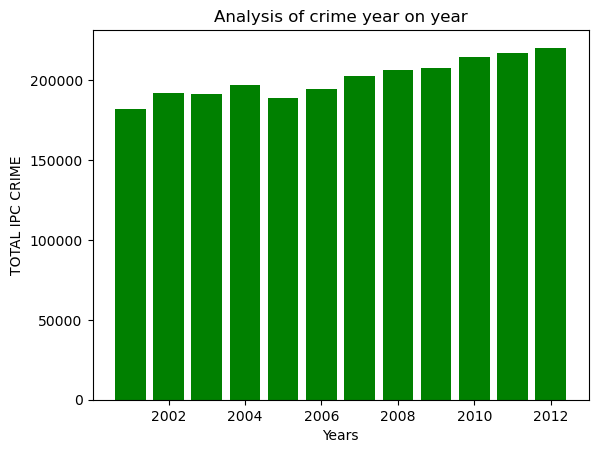

In [43]:
x=data['YEAR']
y=data['TOTAL IPC CRIMES']
plt.bar(x,y,color='green')
plt.xlabel('Years')
plt.ylabel('TOTAL IPC CRIME')
plt.title('Analysis of crime year on year')
plt.show()

THE TOTAL IPC CRIMES HAVE BEEN INCREASING OVER THE YEARS.

THE HIGHEST NUMBER OF TOTAL CRIME WAS RECORDED IN 2012. THE LOWEST NUMBER OF CRIMES WAS RECORDED IN 20002.

# ANALYSIS OF POPULATION

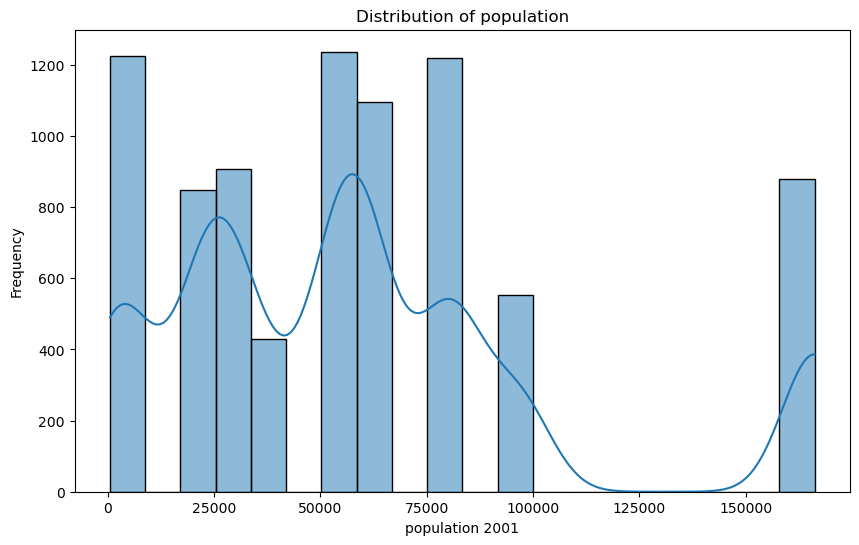

In [44]:
plt.figure(figsize=(10, 6))
sns.histplot(data['2001 - POP'], bins=20, kde=True)
plt.title('Distribution of population')
plt.xlabel('population 2001')
plt.ylabel('Frequency')
plt.show()

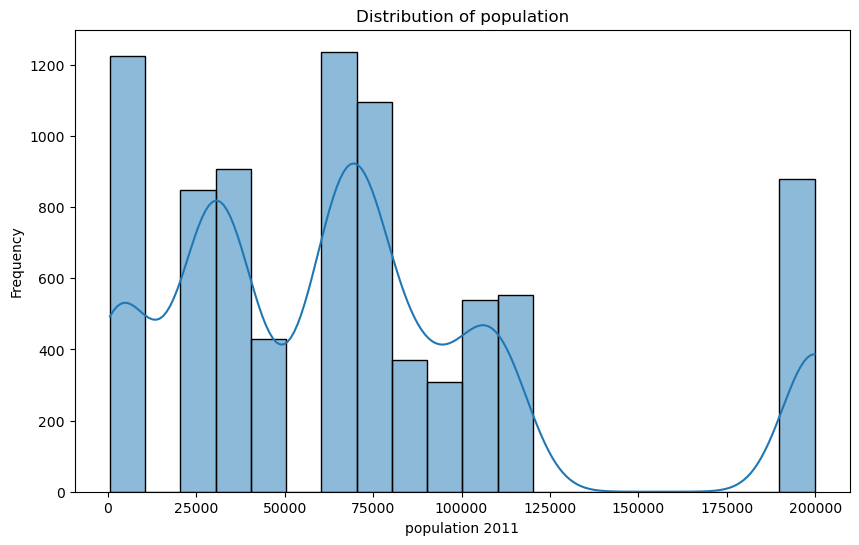

In [45]:
plt.figure(figsize=(10, 6))
sns.histplot(data['2011- POP'], bins=20, kde=True)
plt.title('Distribution of population')
plt.xlabel('population 2011')
plt.ylabel('Frequency')
plt.show()

# GRAPHICAL REPRESENTATION OF TYPES OF CRIME VS EACH STATE VS LITERACY RATE

In [46]:
data.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,2001 - LIT,2011- LIT,2001 - POP,2011- POP,2001 -SEX_Ratio,2011 -SEX_Ratio,2001 -UNEMP,2011 -UNEMP,2001 -Poverty,2011 -Poverty
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,60.47,67.02,76210,84581,978,993,8,12,15.77,9.2
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,60.47,67.02,76210,84581,978,993,8,12,15.77,9.2
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,60.47,67.02,76210,84581,978,993,8,12,15.77,9.2
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,60.47,67.02,76210,84581,978,993,8,12,15.77,9.2
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,60.47,67.02,76210,84581,978,993,8,12,15.77,9.2


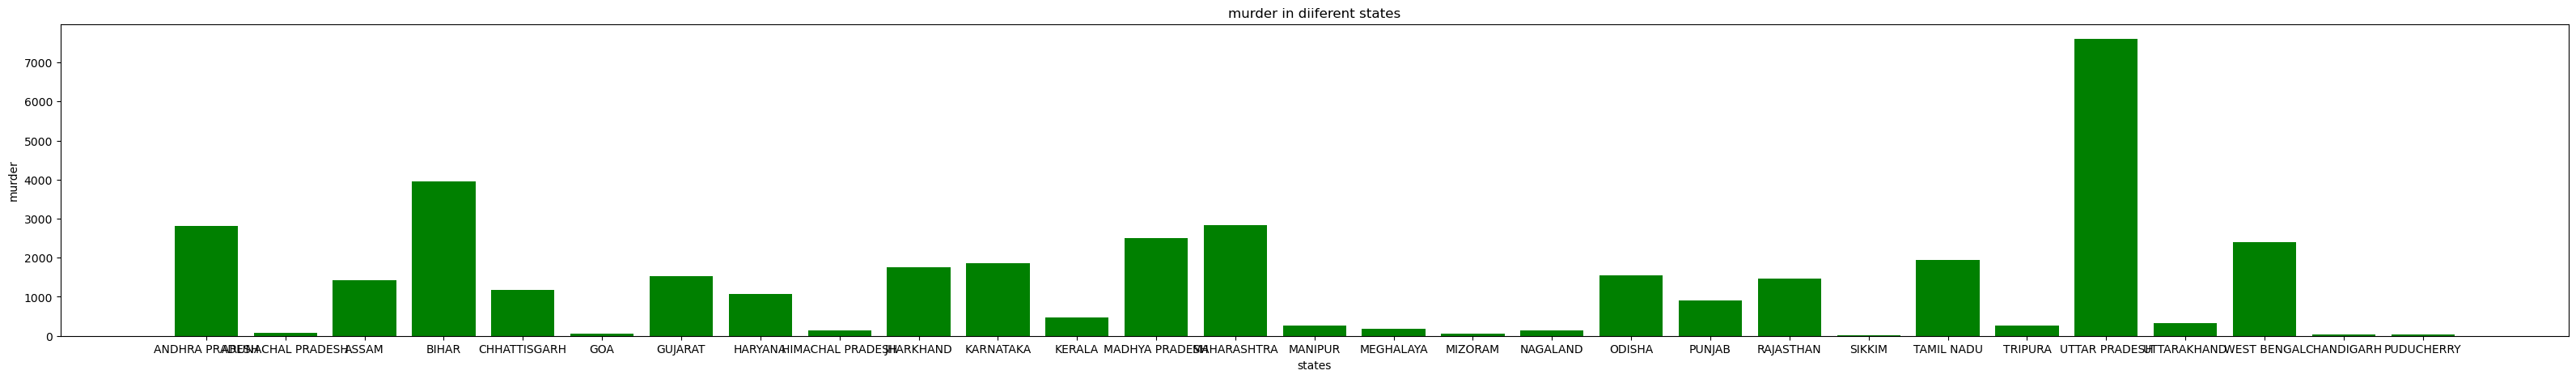

In [47]:
plt.figure(figsize=(40,5))
y=data['MURDER']
x=data['STATE/UT']
plt.bar(x,y,color='green')
plt.xlabel('states')
plt.ylabel('murder')
plt.title('murder in diiferent states')
plt.show()

MAXIMUM MURDERS ARE THERE IN THE STATE OF UTTAR PRADESH
LOWEST MURDERS ARE HAPPENING IN CHANDIGARH,PONDICHERRY,MIZORAM WHERE THE LITERACY RATES ARE ALSO HIGH IN THESE STATES

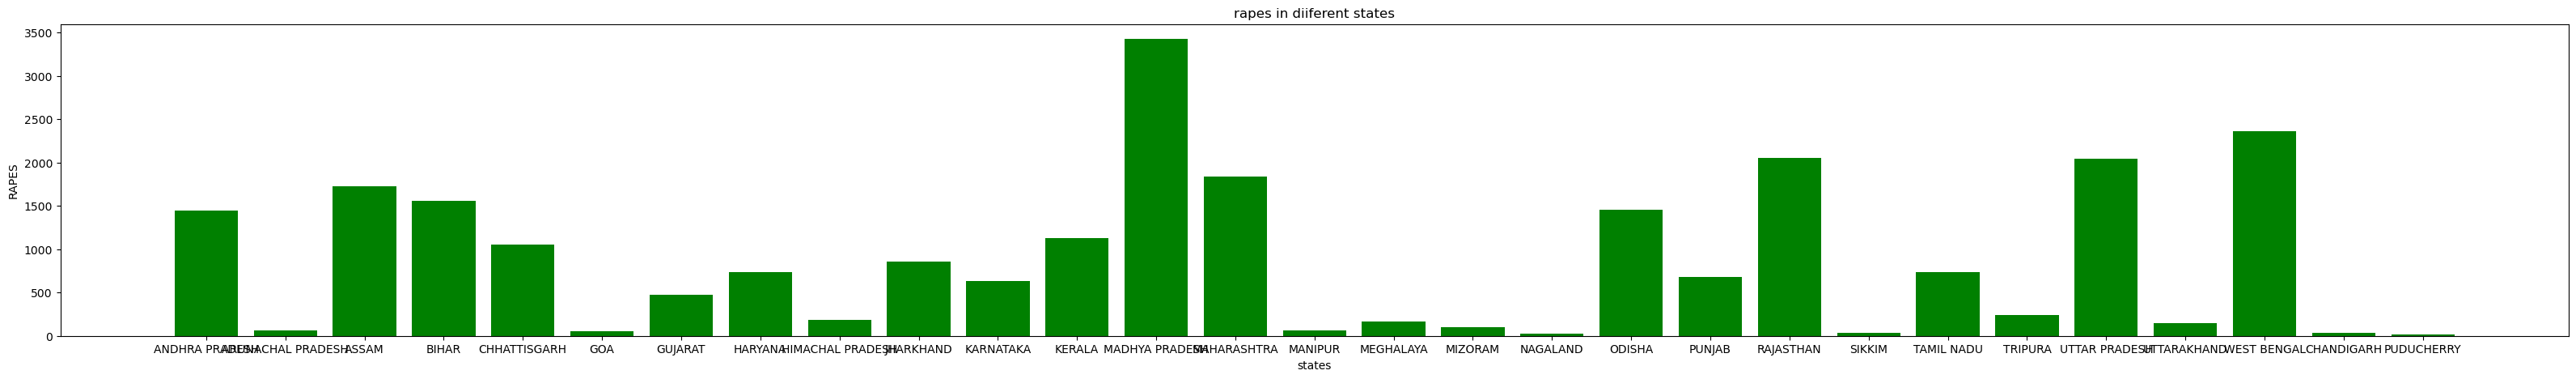

In [48]:
plt.figure(figsize=(40,5))
y=data['RAPE']
x=data['STATE/UT']
plt.bar(x,y,color='green')
plt.xlabel('states')
plt.ylabel('RAPES')
plt.title('rapes in diiferent states')
plt.show()

RAPES ARE HIGHEST IN THE STATE OF MADHYA PRADESH FOLLOWED BY MAHARASHTRA,UTTAR PRADESH,WEST BENGAL

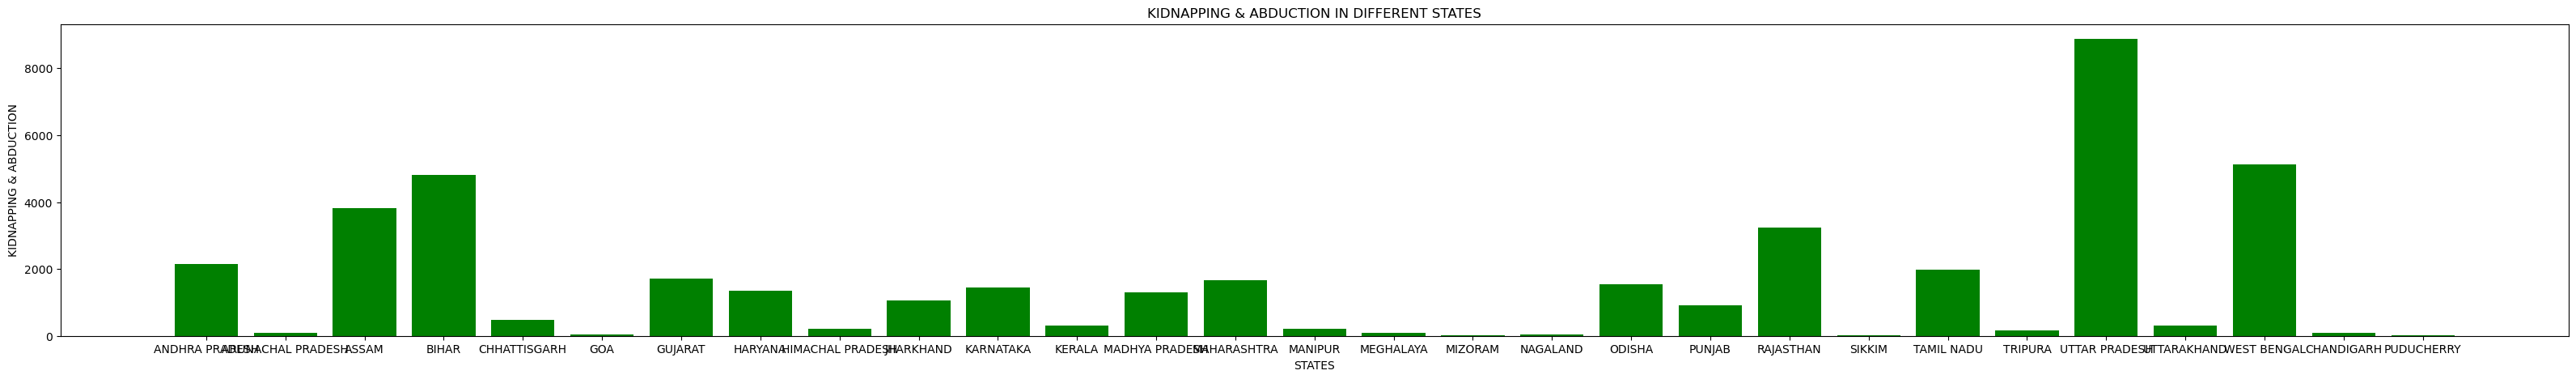

In [49]:
plt.figure(figsize=(40,5))
y=data['KIDNAPPING & ABDUCTION']
x=data['STATE/UT']
plt.bar(x,y,color='green')
plt.xlabel('STATES')
plt.ylabel('KIDNAPPING & ABDUCTION')
plt.title('KIDNAPPING & ABDUCTION IN DIFFERENT STATES')
plt.show()

KIDNAPPING AND ABDUCTION IS HIGHEST IN THE STATE OF UTTAR PRADESH FOLLOWED BY WEST BENGAL,BIHAR AND ASSAM

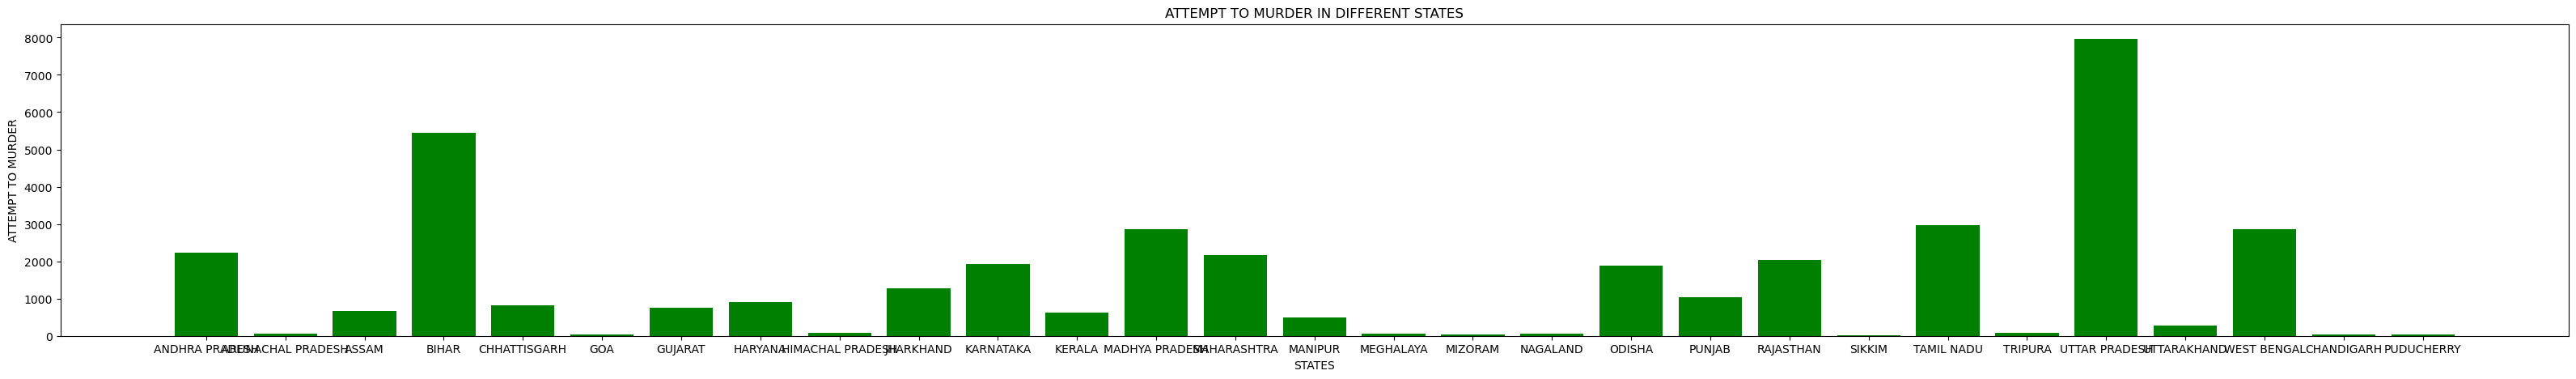

In [50]:
plt.figure(figsize=(40,5))
y=data['ATTEMPT TO MURDER']
x=data['STATE/UT']
plt.bar(x,y,color='green')
plt.xlabel('STATES')
plt.ylabel('ATTEMPT TO MURDER')
plt.title('ATTEMPT TO MURDER IN DIFFERENT STATES')
plt.show()

MAXIMUM ATTEMPT TO MURDERS ARE THERE IN THE STATE OF UTTAR PRADESH FOLLOWERD BY BIHAR

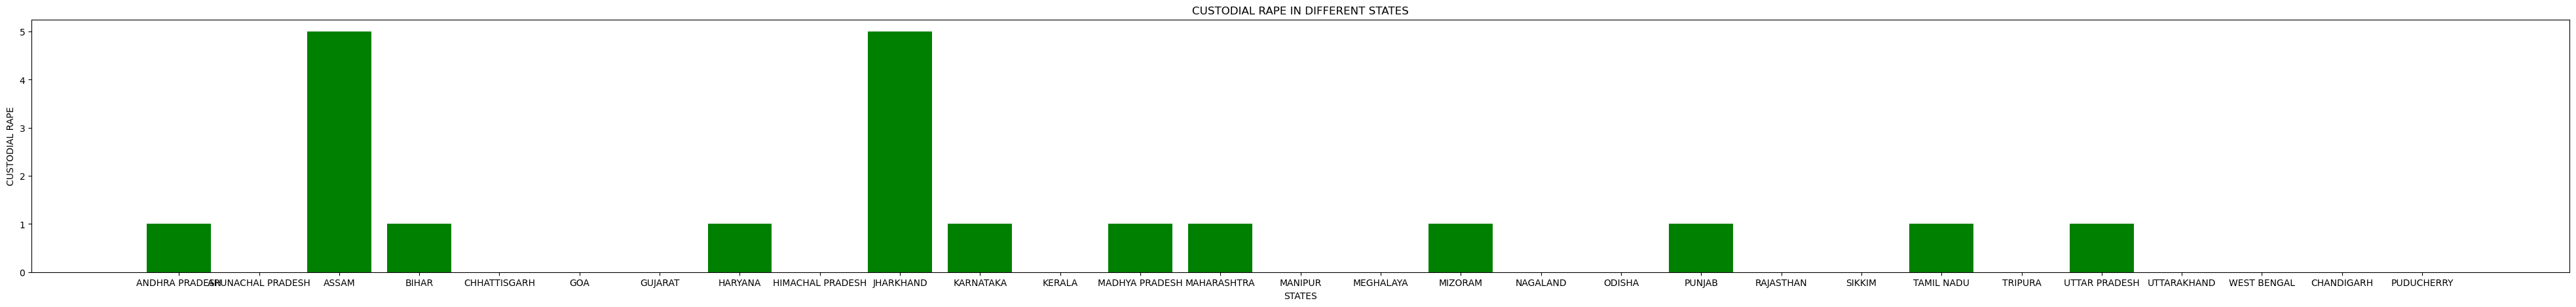

In [51]:
plt.figure(figsize=(50,5))
y=data['CUSTODIAL RAPE']
x=data['STATE/UT']
plt.bar(x,y,color='green')
plt.xlabel('STATES')
plt.ylabel('CUSTODIAL RAPE')
plt.title('CUSTODIAL RAPE IN DIFFERENT STATES')
plt.show()

HIGHEST EVER CUSTODIAL RAPES ARE HAPPENING IN ASSAM,JHARKAND

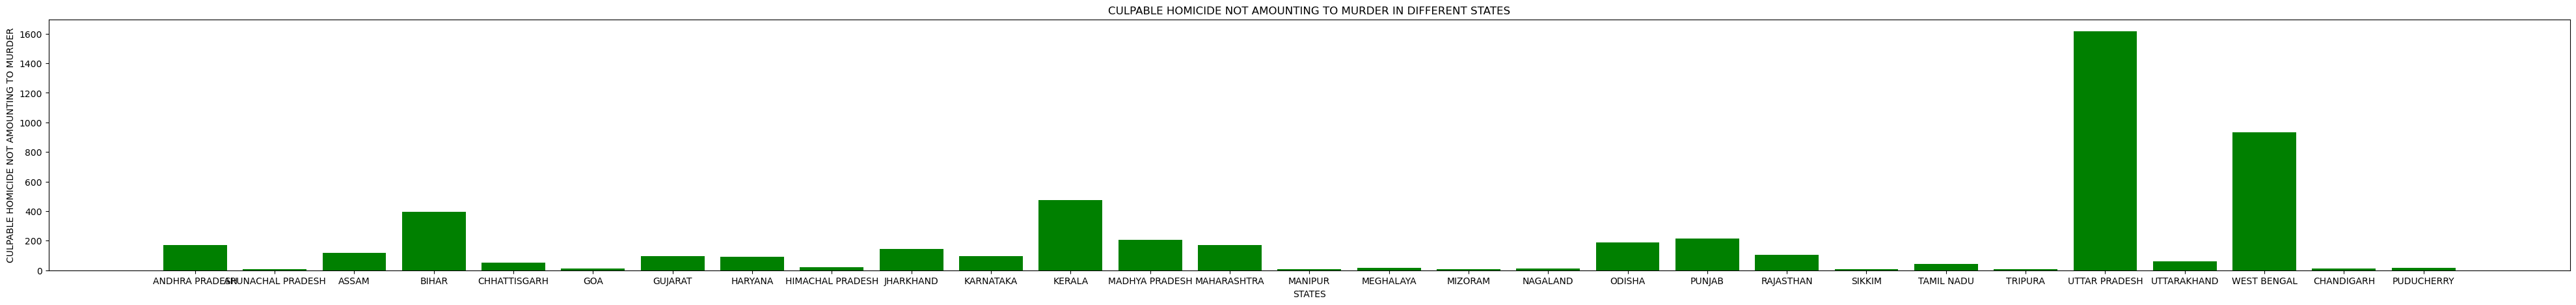

In [52]:
plt.figure(figsize=(50,5))
y=data['CULPABLE HOMICIDE NOT AMOUNTING TO MURDER']
x=data['STATE/UT']
plt.bar(x,y,color='green')
plt.xlabel('STATES')
plt.ylabel('CULPABLE HOMICIDE NOT AMOUNTING TO MURDER')
plt.title('CULPABLE HOMICIDE NOT AMOUNTING TO MURDER IN DIFFERENT STATES')
plt.show()

 MAXIMUM CULPABLE HOMICIDE NOT AMOUNTING TO MURDER ARE HAPPENING IN THE STATES OF UTTAR PRADESH FOLLOWED BY WEST BENGAL

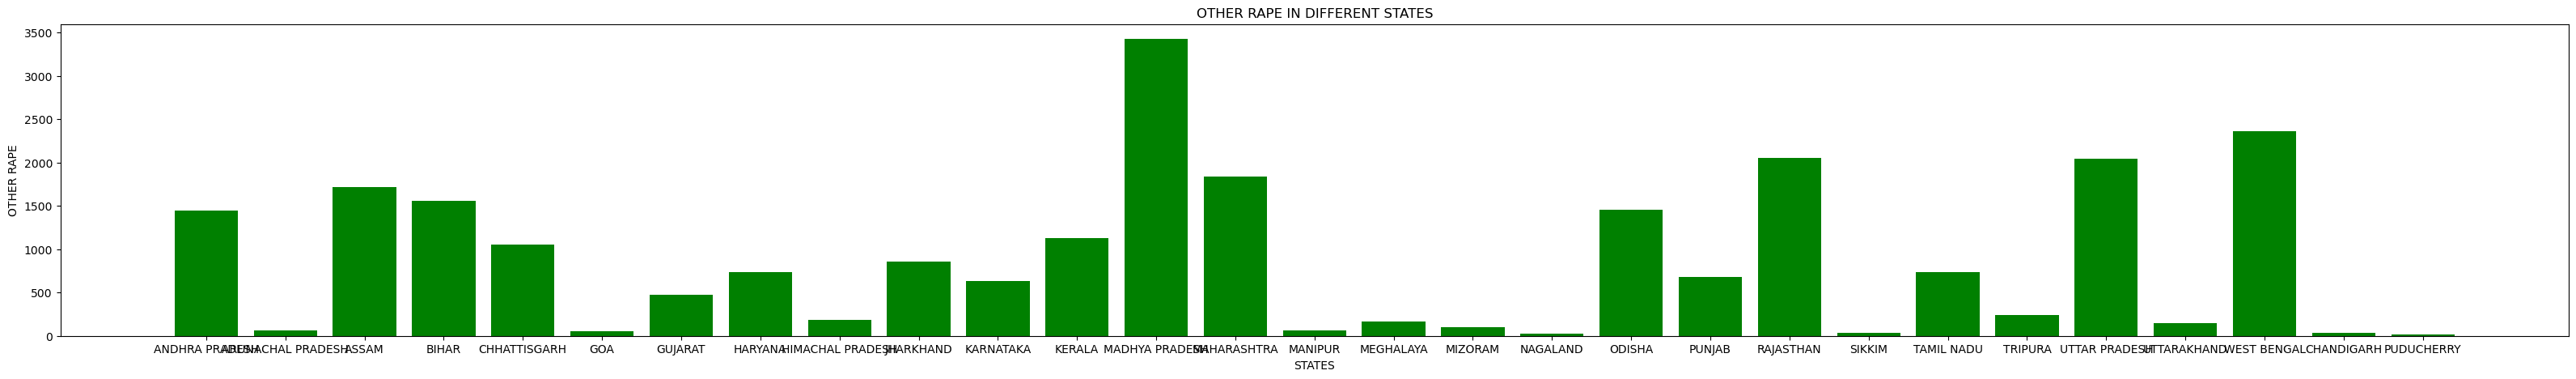

In [53]:
plt.figure(figsize=(40,5))
y=data['OTHER RAPE']
x=data['STATE/UT']
plt.bar(x,y,color='green')
plt.xlabel('STATES')
plt.ylabel('OTHER RAPE')
plt.title('OTHER RAPE IN DIFFERENT STATES')
plt.show()

# OTHER RAPE ARE MAXIMUM IN THE STATES OF MADHYA PRADESH,MAHARASHTRA,RAJASTHAN,UTTAR PRADESH AMD WESTBENGAL

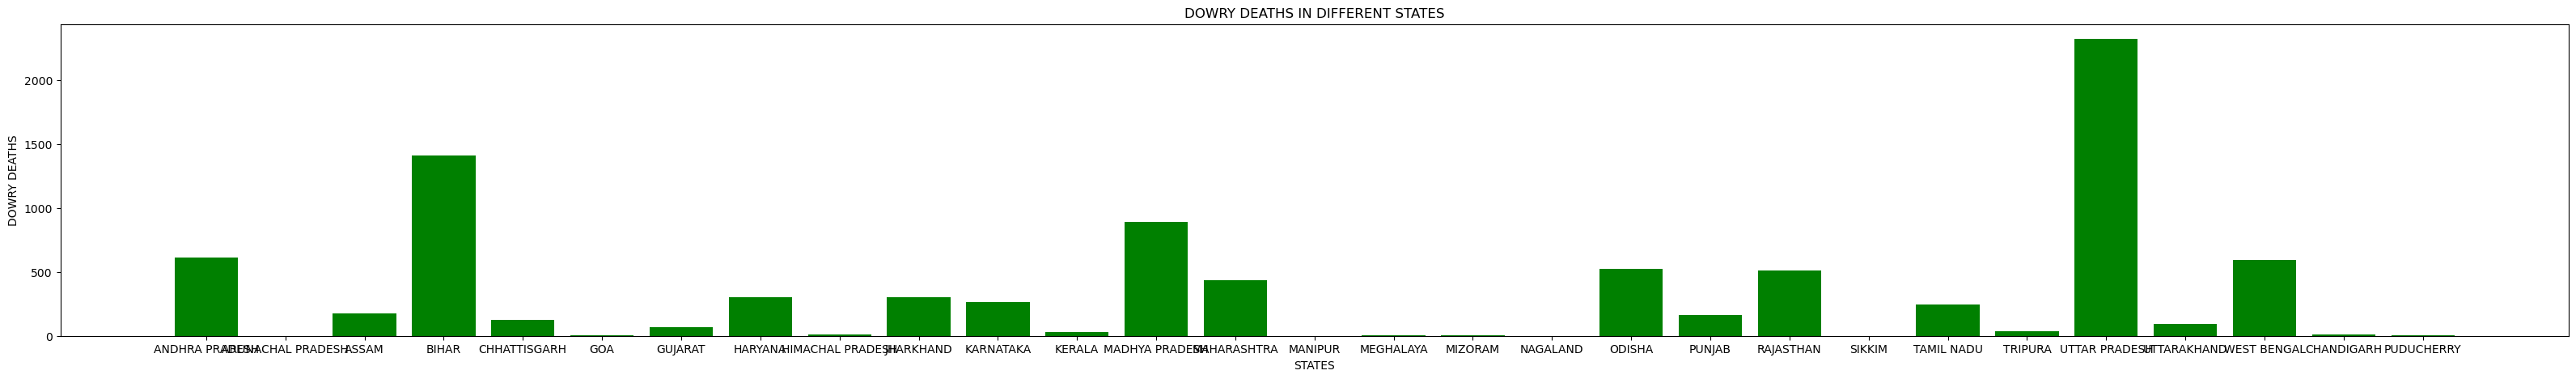

In [55]:
plt.figure(figsize=(40,5))
y=data['DOWRY DEATHS']
x=data['STATE/UT']
plt.bar(x,y,color='green')
plt.xlabel('STATES')
plt.ylabel('DOWRY DEATHS')
plt.title('DOWRY DEATHS IN DIFFERENT STATES')
plt.show()

DOWRY DEATHS ARE MAXIMUM IN THE STATES OF UTTAR PRADESH AND BIHAR

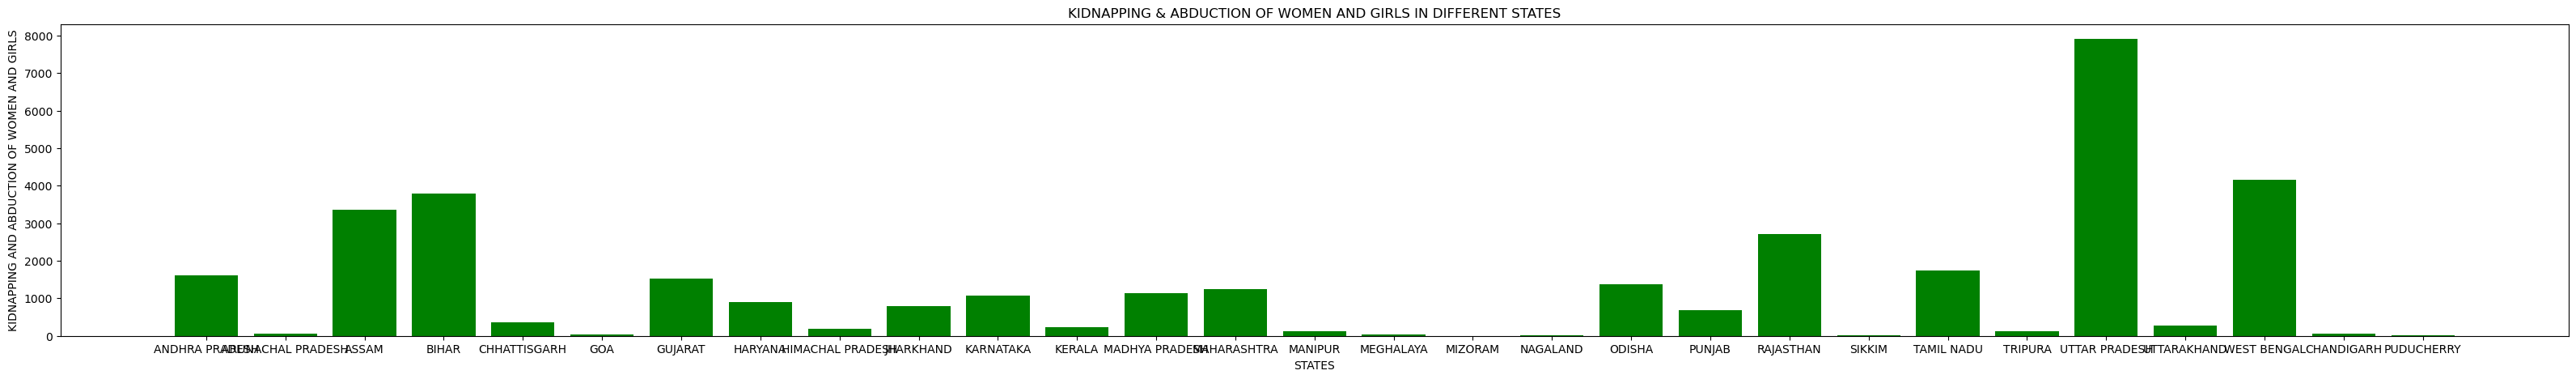

In [56]:
plt.figure(figsize=(40,5))
y=data['KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS']
x=data['STATE/UT']
plt.bar(x,y,color='green')
plt.xlabel('STATES')
plt.ylabel('KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS')
plt.title('KIDNAPPING & ABDUCTION OF WOMEN AND GIRLS IN DIFFERENT STATES')
plt.show()

KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS ARE HIGHEST IN THE STATE OF UTTAR PRADESH

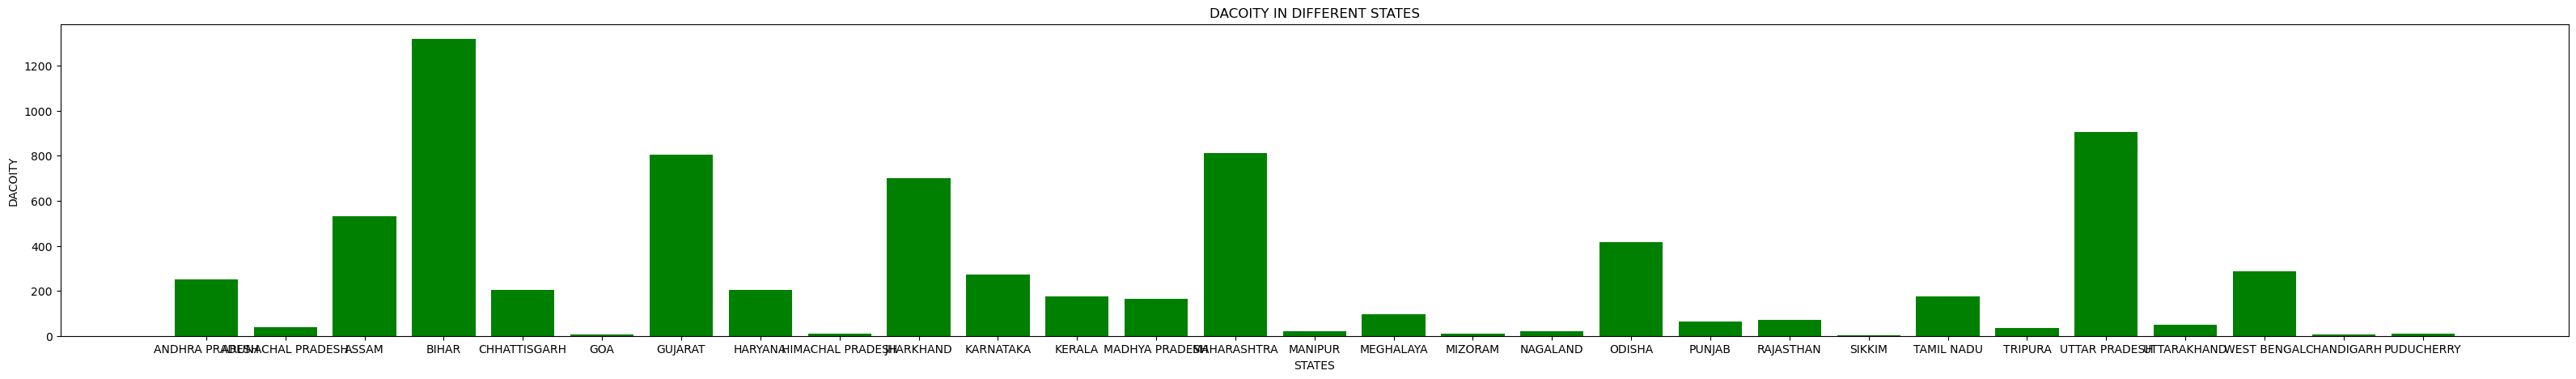

In [57]:
plt.figure(figsize=(40,5))
y=data['DACOITY']
x=data['STATE/UT']
plt.bar(x,y,color='green')
plt.xlabel('STATES')
plt.ylabel('DACOITY')
plt.title('DACOITY IN DIFFERENT STATES')
plt.show()

DACOITY ARE HIGHEST IN THE STATES OF BIHAR,MAHARASHTRA AND UTTARPRADESH

In [78]:
data.skew()

YEAR                                                   -0.039236
MURDER                                                 10.353368
ATTEMPT TO MURDER                                      11.171720
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              19.592266
RAPE                                                    9.460783
CUSTODIAL RAPE                                         30.776477
OTHER RAPE                                              9.461466
KIDNAPPING & ABDUCTION                                 13.068701
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS            15.138650
KIDNAPPING AND ABDUCTION OF OTHERS                     13.182462
DACOITY                                                12.255312
PREPARATION AND ASSEMBLY FOR DACOITY                   16.867040
ROBBERY                                                11.403923
BURGLARY                                               10.083801
THEFT                                                   9.548345
AUTO THEFT               

In [79]:
data.isnull().sum()

STATE/UT                                               0
DISTRICT                                               0
YEAR                                                   0
MURDER                                                 0
ATTEMPT TO MURDER                                      0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              0
RAPE                                                   0
CUSTODIAL RAPE                                         0
OTHER RAPE                                             0
KIDNAPPING & ABDUCTION                                 0
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS            0
KIDNAPPING AND ABDUCTION OF OTHERS                     0
DACOITY                                                0
PREPARATION AND ASSEMBLY FOR DACOITY                   0
ROBBERY                                                0
BURGLARY                                               0
THEFT                                                  0
AUTO THEFT                     

In [80]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['STATE/UT']=le.fit_transform(data['STATE/UT'])
data['DISTRICT']=le.fit_transform(data['DISTRICT'])
data

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,2001 - LIT,2011- LIT,2001 - POP,2011- POP,2001 -SEX_Ratio,2011 -SEX_Ratio,2001 -UNEMP,2011 -UNEMP,2001 -Poverty,2011 -Poverty
0,0,2,2001,101,60,17,50,0,50,46,...,60.47,67.02,76210,84581,978,993,8,12,15.77,9.20
1,0,27,2001,151,125,1,23,0,23,53,...,60.47,67.02,76210,84581,978,993,8,12,15.77,9.20
2,0,142,2001,101,57,2,27,0,27,59,...,60.47,67.02,76210,84581,978,993,8,12,15.77,9.20
3,0,156,2001,80,53,1,20,0,20,25,...,60.47,67.02,76210,84581,978,993,8,12,15.77,9.20
4,0,199,2001,82,67,1,23,0,23,49,...,60.47,67.02,76210,84581,978,993,8,12,15.77,9.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8387,20,545,2011,32,20,10,7,0,7,11,...,88.80,91.33,974,1248,1001,1037,40,8,21.67,9.69
8388,20,691,2011,32,22,12,7,0,7,12,...,88.80,91.33,974,1248,1001,1037,40,8,21.67,9.69
8389,20,353,2012,5,6,2,6,0,6,2,...,88.80,91.33,974,1248,1001,1037,40,8,21.67,9.69
8390,20,545,2012,24,21,10,7,0,7,17,...,88.80,91.33,974,1248,1001,1037,40,8,21.67,9.69


STATE/UT                                                  Axes(0.125,0.825775;0.168478x0.0542254)
DISTRICT                                               Axes(0.327174,0.825775;0.168478x0.0542254)
YEAR                                                   Axes(0.529348,0.825775;0.168478x0.0542254)
MURDER                                                 Axes(0.731522,0.825775;0.168478x0.0542254)
ATTEMPT TO MURDER                                         Axes(0.125,0.760704;0.168478x0.0542254)
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              Axes(0.327174,0.760704;0.168478x0.0542254)
RAPE                                                   Axes(0.529348,0.760704;0.168478x0.0542254)
CUSTODIAL RAPE                                         Axes(0.731522,0.760704;0.168478x0.0542254)
OTHER RAPE                                                Axes(0.125,0.695634;0.168478x0.0542254)
KIDNAPPING & ABDUCTION                                 Axes(0.327174,0.695634;0.168478x0.0542254)
KIDNAPPING AND ABDUC

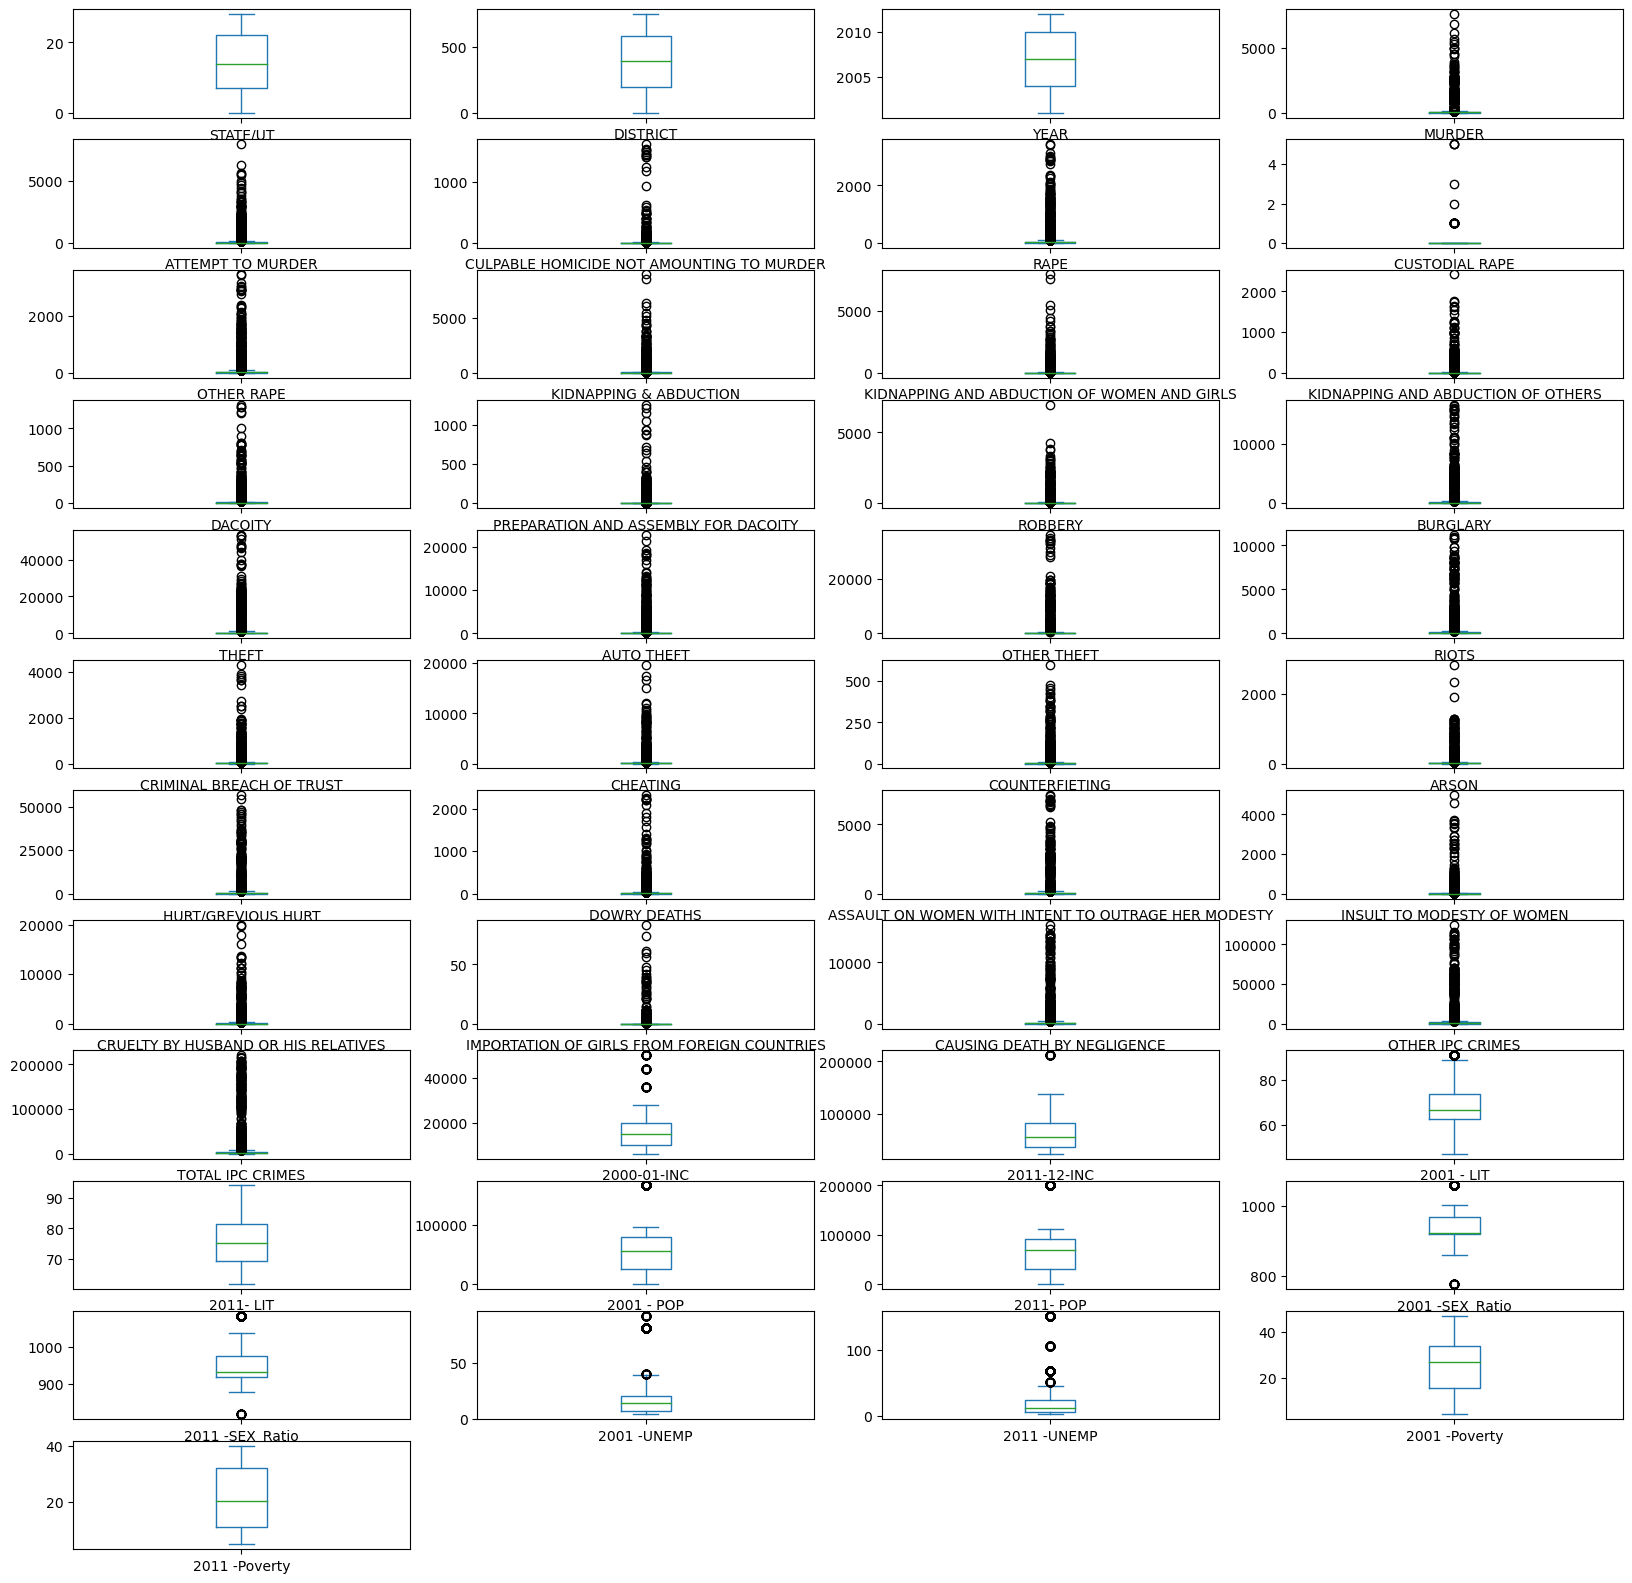

In [81]:
#plotting outliers
data.plot(kind='box',subplots=True,layout=(12,4),figsize=(20,20))

In [83]:
#REMOVING OUTLIERS
from scipy.stats import zscore
z=np.abs(zscore(data))
z

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,2001 - LIT,2011- LIT,2001 - POP,2011- POP,2001 -SEX_Ratio,2011 -SEX_Ratio,2001 -UNEMP,2011 -UNEMP,2001 -Poverty,2011 -Poverty
0,1.657972,1.749251,1.622483,0.024073,0.064513,0.108230,0.024169,0.051888,0.024140,0.097244,...,0.666444,1.085840,0.377673,0.269257,1.044135,1.124169,0.540946,0.359295,0.911551,1.28672
1,1.657972,1.635386,1.622483,0.172177,0.143722,0.151516,0.161691,0.051888,0.161673,0.075072,...,0.666444,1.085840,0.377673,0.269257,1.044135,1.124169,0.540946,0.359295,0.911551,1.28672
2,1.657972,1.111605,1.622483,0.024073,0.074123,0.135282,0.141317,0.051888,0.141298,0.056068,...,0.666444,1.085840,0.377673,0.269257,1.044135,1.124169,0.540946,0.359295,0.911551,1.28672
3,1.657972,1.047840,1.622483,0.038131,0.086938,0.151516,0.176971,0.051888,0.176954,0.163758,...,0.666444,1.085840,0.377673,0.269257,1.044135,1.124169,0.540946,0.359295,0.911551,1.28672
4,1.657972,0.851992,1.622483,0.032207,0.042087,0.151516,0.161691,0.051888,0.161673,0.087742,...,0.666444,1.085840,0.377673,0.269257,1.044135,1.124169,0.540946,0.359295,0.911551,1.28672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8387,0.656657,0.723906,1.266031,0.180311,0.192657,0.005409,0.243185,0.051888,0.243174,0.208100,...,1.878734,1.715602,1.267970,1.247511,1.613114,2.218373,1.583940,0.532593,0.391821,1.23889
8388,0.656657,1.388880,1.266031,0.180311,0.186250,0.027060,0.243185,0.051888,0.243174,0.204933,...,1.878734,1.715602,1.267970,1.247511,1.613114,2.218373,1.583940,0.532593,0.391821,1.23889
8389,0.656657,0.150581,1.554883,0.260287,0.237507,0.135282,0.248278,0.051888,0.248268,0.236606,...,1.878734,1.715602,1.267970,1.247511,1.613114,2.218373,1.583940,0.532593,0.391821,1.23889
8390,0.656657,0.723906,1.554883,0.204008,0.189453,0.005409,0.243185,0.051888,0.243174,0.189096,...,1.878734,1.715602,1.267970,1.247511,1.613114,2.218373,1.583940,0.532593,0.391821,1.23889


In [84]:
threshold=3
print(np.where(z>3))

(array([  28,   28,   28, ..., 8389, 8390, 8391], dtype=int64), array([ 3,  4,  6, ..., 33, 33, 33], dtype=int64))


In [85]:
data_new=data[(z<3).all(axis=1)]
data_new

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,2001 - LIT,2011- LIT,2001 - POP,2011- POP,2001 -SEX_Ratio,2011 -SEX_Ratio,2001 -UNEMP,2011 -UNEMP,2001 -Poverty,2011 -Poverty
0,0,2,2001,101,60,17,50,0,50,46,...,60.47,67.02,76210,84581,978,993,8,12,15.77,9.20
1,0,27,2001,151,125,1,23,0,23,53,...,60.47,67.02,76210,84581,978,993,8,12,15.77,9.20
2,0,142,2001,101,57,2,27,0,27,59,...,60.47,67.02,76210,84581,978,993,8,12,15.77,9.20
3,0,156,2001,80,53,1,20,0,20,25,...,60.47,67.02,76210,84581,978,993,8,12,15.77,9.20
4,0,199,2001,82,67,1,23,0,23,49,...,60.47,67.02,76210,84581,978,993,8,12,15.77,9.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8331,28,553,2012,66,12,6,50,0,50,44,...,56.27,67.68,80176,91276,934,950,28,27,27.02,19.98
8332,28,607,2012,19,9,2,0,0,0,7,...,56.27,67.68,80176,91276,934,950,28,27,27.02,19.98
8333,28,630,2012,4,1,0,0,0,0,3,...,56.27,67.68,80176,91276,934,950,28,27,27.02,19.98
8334,28,631,2012,32,6,6,21,0,21,123,...,56.27,67.68,80176,91276,934,950,28,27,27.02,19.98


array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>

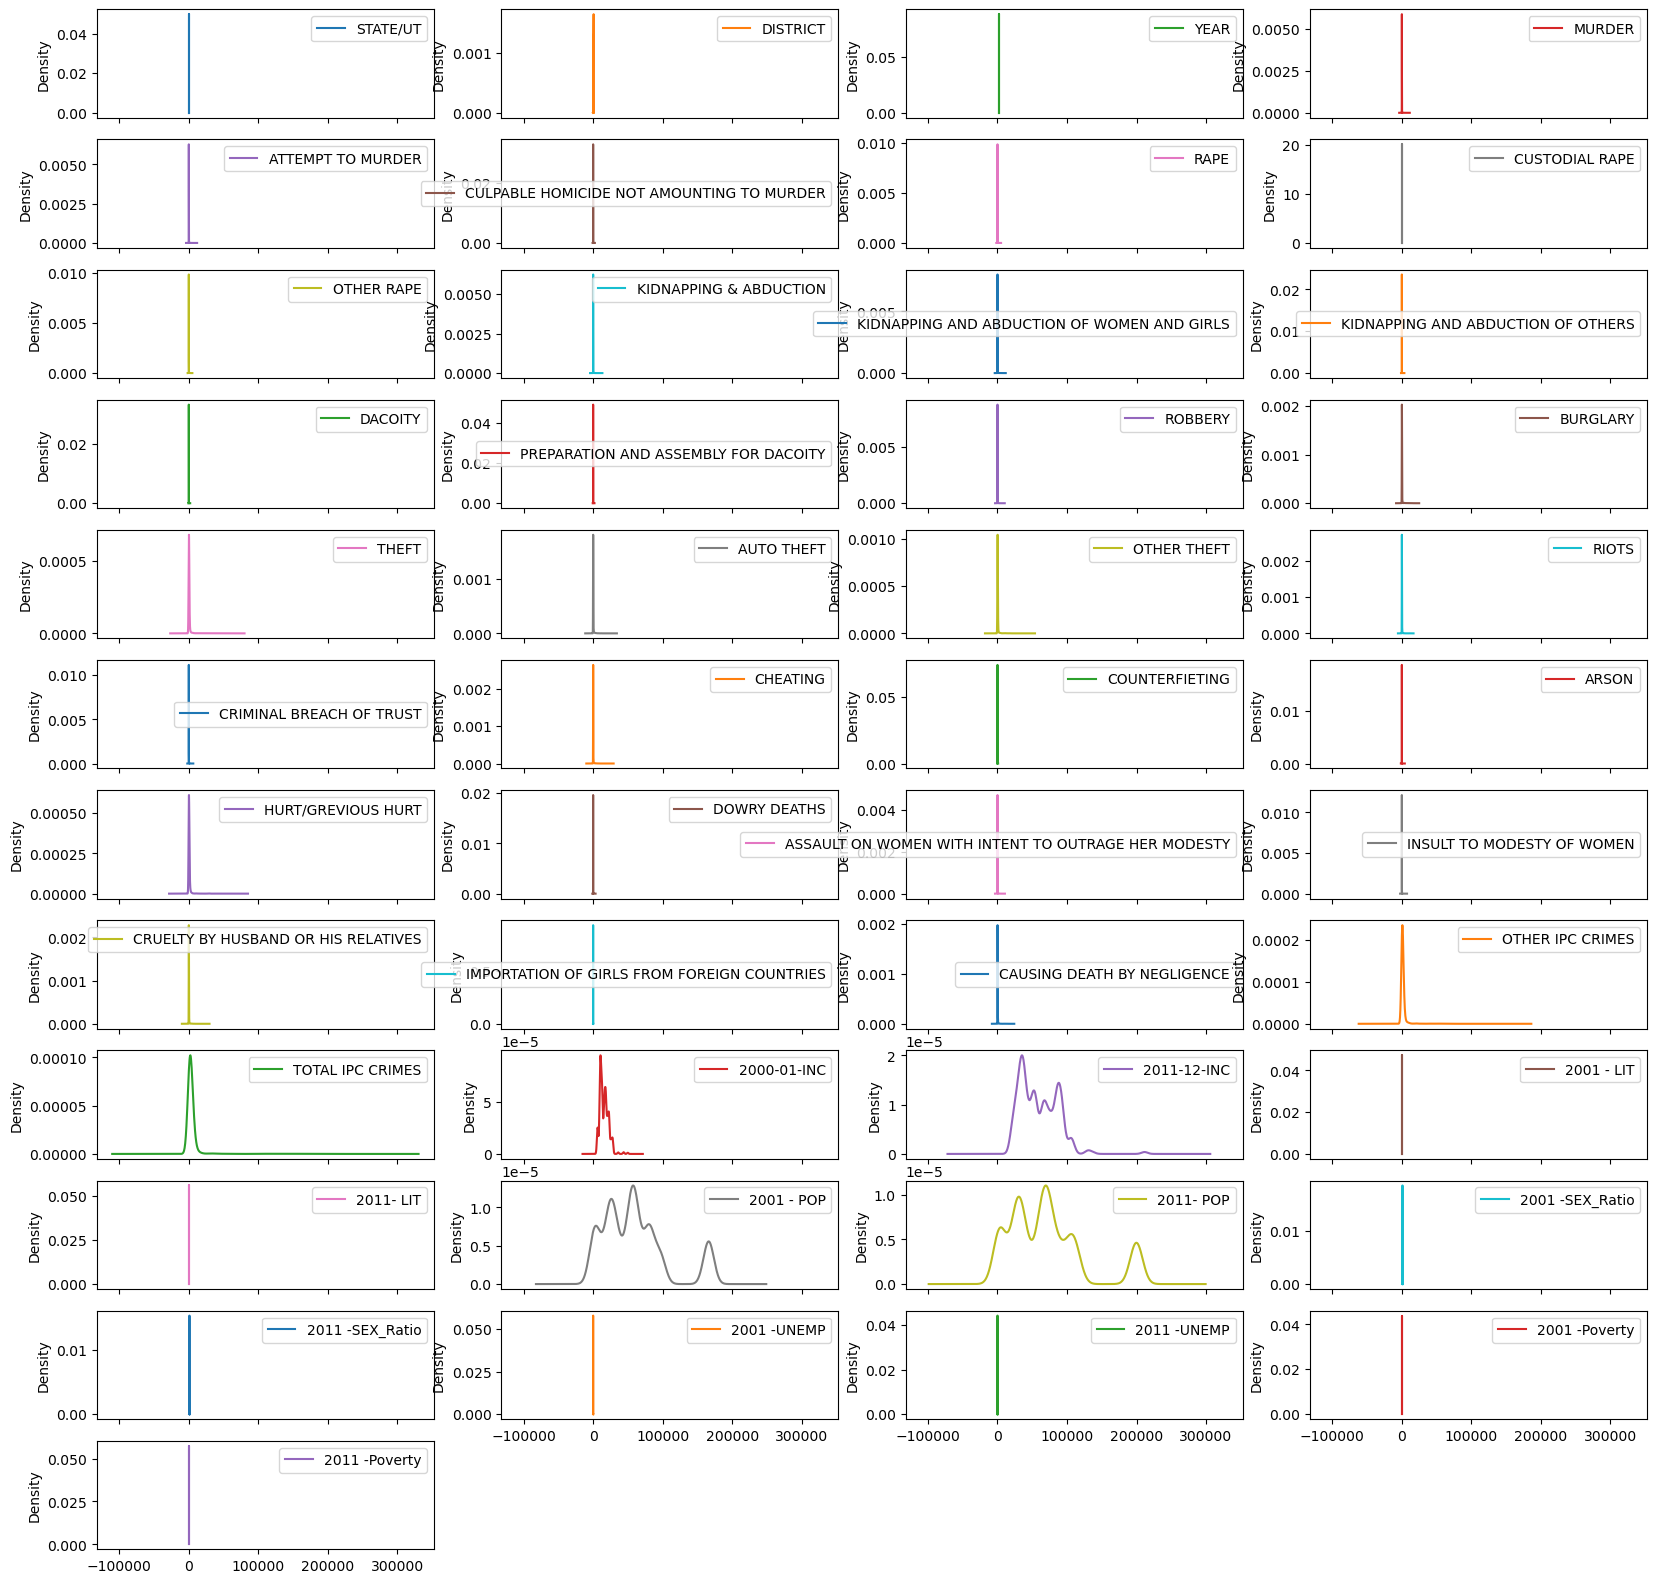

In [14]:
CH

from the above we can see that much of the data is not normally distributed

WE CAN DROP SEX RATIO AS ITS NOT HELPING MUCH IN OUR ANALYSIS OF DATA

In [86]:
data_new.drop(['2001 -SEX_Ratio','2011 -SEX_Ratio'],axis=1,inplace=True)

In [87]:
data_new

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,2000-01-INC,2011-12-INC,2001 - LIT,2011- LIT,2001 - POP,2011- POP,2001 -UNEMP,2011 -UNEMP,2001 -Poverty,2011 -Poverty
0,0,2,2001,101,60,17,50,0,50,46,...,17195,64773,60.47,67.02,76210,84581,8,12,15.77,9.20
1,0,27,2001,151,125,1,23,0,23,53,...,17195,64773,60.47,67.02,76210,84581,8,12,15.77,9.20
2,0,142,2001,101,57,2,27,0,27,59,...,17195,64773,60.47,67.02,76210,84581,8,12,15.77,9.20
3,0,156,2001,80,53,1,20,0,20,25,...,17195,64773,60.47,67.02,76210,84581,8,12,15.77,9.20
4,0,199,2001,82,67,1,23,0,23,49,...,17195,64773,60.47,67.02,76210,84581,8,12,15.77,9.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8331,28,553,2012,66,12,6,50,0,50,44,...,16583,53383,56.27,67.68,80176,91276,28,27,27.02,19.98
8332,28,607,2012,19,9,2,0,0,0,7,...,16583,53383,56.27,67.68,80176,91276,28,27,27.02,19.98
8333,28,630,2012,4,1,0,0,0,0,3,...,16583,53383,56.27,67.68,80176,91276,28,27,27.02,19.98
8334,28,631,2012,32,6,6,21,0,21,123,...,16583,53383,56.27,67.68,80176,91276,28,27,27.02,19.98


# ANALYSIS OF LITERACY RATE vs TOTAL CRIMES

# TAKING TOTAL CRIMES AS A TARGET VARIABLE TO PREDICT THE EFFECT OF TOTAL CRIMES ON LITERACY RATES

# SPLITTING THE DATA INTO X AND Y                                                                                                    

In [34]:
x=data_new.drop(['TOTAL IPC CRIMES','2001 - POP','2011- POP'],axis=1)
x

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,2000-01-INC,2011-12-INC,2001 - LIT,2011- LIT,2001 -UNEMP,2011 -UNEMP,2001 -Poverty,2011 -Poverty
0,0,2,2001,101,60,17,50,0,50,46,...,181,1518,17195,64773,60.47,67.02,8,12,15.77,9.20
1,0,27,2001,151,125,1,23,0,23,53,...,270,754,17195,64773,60.47,67.02,8,12,15.77,9.20
2,0,142,2001,101,57,2,27,0,27,59,...,404,1262,17195,64773,60.47,67.02,8,12,15.77,9.20
3,0,156,2001,80,53,1,20,0,20,25,...,233,1181,17195,64773,60.47,67.02,8,12,15.77,9.20
4,0,199,2001,82,67,1,23,0,23,49,...,431,2313,17195,64773,60.47,67.02,8,12,15.77,9.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8331,28,553,2012,66,12,6,50,0,50,44,...,206,565,16583,53383,56.27,67.68,28,27,27.02,19.98
8332,28,607,2012,19,9,2,0,0,0,7,...,0,39,16583,53383,56.27,67.68,28,27,27.02,19.98
8333,28,630,2012,4,1,0,0,0,0,3,...,0,58,16583,53383,56.27,67.68,28,27,27.02,19.98
8334,28,631,2012,32,6,6,21,0,21,123,...,69,385,16583,53383,56.27,67.68,28,27,27.02,19.98


In [35]:
y=data_new['TOTAL IPC CRIMES']
y

0       4154
1       4125
2       5818
3       3140
4       6507
        ... 
8331    1841
8332     657
8333     248
8334    3023
8335    5212
Name: TOTAL IPC CRIMES, Length: 7553, dtype: int64

# FIRST THERE IS A NEED TO APPLY PRINCIPAL COMPONENT ANALYSIS(PCA)

PCA IS A DIMENSIONALITY REDUCTION TECHNIQUE THAT TRANSFORMS A SET OF CORRELATED FEATURES INTO A SET OF UNCORRELATED FEATURES

In [100]:
#calling library
from sklearn.decomposition import PCA

In [37]:
pca=PCA(n_components=10)
xpca=pca.fit_transform(x)
x=xpca


In [34]:
pd.DataFrame(data=x)

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,2000-01-INC,2011-12-INC,2001 -UNEMP,2011 -UNEMP,2001 -Poverty,2011 -Poverty
0,0,2,2001,101,60,17,50,0,50,46,...,0,181,1518,4154,17195,64773,8,12,15.77,9.20
1,0,27,2001,151,125,1,23,0,23,53,...,0,270,754,4125,17195,64773,8,12,15.77,9.20
2,0,142,2001,101,57,2,27,0,27,59,...,0,404,1262,5818,17195,64773,8,12,15.77,9.20
3,0,156,2001,80,53,1,20,0,20,25,...,0,233,1181,3140,17195,64773,8,12,15.77,9.20
4,0,199,2001,82,67,1,23,0,23,49,...,0,431,2313,6507,17195,64773,8,12,15.77,9.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8331,28,553,2012,66,12,6,50,0,50,44,...,0,206,565,1841,16583,53383,28,27,27.02,19.98
8332,28,607,2012,19,9,2,0,0,0,7,...,0,0,39,657,16583,53383,28,27,27.02,19.98
8333,28,630,2012,4,1,0,0,0,0,3,...,0,0,58,248,16583,53383,28,27,27.02,19.98
8334,28,631,2012,32,6,6,21,0,21,123,...,0,69,385,3023,16583,53383,28,27,27.02,19.98


# STANDARD SCALER

In [97]:
from sklearn.preprocessing import StandardScaler

In [40]:
sc=StandardScaler()

In [41]:
X=sc.fit_transform(x)
X

array([[ 0.28974233, -0.19068244,  0.3441774 , ...,  0.15150279,
        -0.00502408, -0.06279545],
       [ 0.28966034, -0.19809045, -0.05131642, ...,  0.38944273,
         0.80660308,  0.8502559 ],
       [ 0.28987335, -0.19276572,  0.51687005, ...,  0.34961185,
         1.08003093, -0.28970221],
       ...,
       [-0.1534772 , -0.7941945 , -0.80731769, ...,  0.37009657,
        -0.36234016, -0.39307132],
       [-0.15323888, -0.79065181, -0.19649803, ..., -0.78935248,
        -2.31280246, -0.58420415],
       [-0.15300778, -0.77653893,  0.7213658 , ..., -1.73892652,
        -4.30674831,  1.14782719]])

# USING DIFFERENT CLASSIFICATION MODELS FOR PREDICTING

In [96]:
#calling library
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [167]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=42)

In [168]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((6042, 10), (1511, 10), (6042,), (1511,))

In [169]:
def classify(clf,X,y):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    acc_score=(accuracy_score(y_test,pred))
    print("Accuracy Score:",acc_score)
    print("\nConfusion Matrix:\n",confusion_matrix(y_test,pred))
    class_report=classification_report(y_test,pred)
    print("\nClassification Report:\n",class_report)
    
    cv_score=(cross_val_score(clf,X,y,cv=5).mean())
    print("Cross validation Score:",cv_score)
    
    result=acc_score-cv_score
    print("\nAccuracy Score-Cross Validation Score",result)
    

# LOGISTIC REGRESSION

In [170]:
clf=LogisticRegression()
classify(clf,X,y)

Accuracy Score: 0.0013236267372600927

Confusion Matrix:
 [[1 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]

Classification Report:
               precision    recall  f1-score   support

           2       0.04      1.00      0.08         1
           5       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         1
          36       0.00      0.00      0.00         1
          38       0.00      0.00      0.00         1
          40       0.00      0.00      0.00         1
          41       0.00      0.00      0.00         1
          43       0.00      0.00      0

# DECISION TREE CLASSIFIER

In [171]:
clf=DecisionTreeClassifier()
classify(clf,X,y)

Accuracy Score: 0.010589013898080741

Confusion Matrix:
 [[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Classification Report:
               precision    recall  f1-score   support

           2       1.00      1.00      1.00         1
           5       0.33      1.00      0.50         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         0
          20       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         0
          29       0.00      0.00      0.00         1
          32       0.00      0.00      0.00         0
          33       0.00      0.00      0.00         0
          36       0.00      0.00      0.

# KNEIGHBORS CLASSIFIER

In [172]:
clf=KNeighborsClassifier()
classify(clf,X,y)

Accuracy Score: 0.004632693580410324

Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.25      1.00      0.40         1
           5       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         0
          25       0.00      0.00      0.00         0
          29       0.00      0.00      0.00         1
          30       0.00      0.00      0.00         0
          32       0.00      0.00      0.

# EXPLANATION RELATED TO DIFFERENT CLASSIFICATION MODELS

THE CLASSIFICATION MODELS USED IN THE STUDY ARE BASED ON DATA COLLECTED FROM VARIOUS SOURCES(GOOGLE,KAGGLE). WE ARE NOT SURE OF THE AYTHENTICITY OF THE DATA

AS A RESULT THE MODEL PERFORMANCE IS AFFECTED AND THIS LIMITATION MAY IMPACT THE RELIABILITY OF THE PREDICTIONS OR RECOMMENDATIONS PRODUCED BY DIFFERENT MODELS

# ANALYSIS OF THE TYPE OF CRIME VS EACH STATE VS LITERACY RATE

IN THIS TYPE OF CRIME WOULD BE TARGET VARIABLE BECAUSE THE GOAL OF OUR ANALYSIS IS TO PREDICT THE RELATIONSHIP BETWEEN THE TYPE WITH OTHER VARIABLE SUCH AS STATE AND LITERACY RATE

In [116]:
#CALLING LIBRARIES
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [92]:
data_new

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,2000-01-INC,2011-12-INC,2001 - LIT,2011- LIT,2001 - POP,2011- POP,2001 -UNEMP,2011 -UNEMP,2001 -Poverty,2011 -Poverty
0,0,2,2001,101,60,17,50,0,50,46,...,17195,64773,60.47,67.02,76210,84581,8,12,15.77,9.20
1,0,27,2001,151,125,1,23,0,23,53,...,17195,64773,60.47,67.02,76210,84581,8,12,15.77,9.20
2,0,142,2001,101,57,2,27,0,27,59,...,17195,64773,60.47,67.02,76210,84581,8,12,15.77,9.20
3,0,156,2001,80,53,1,20,0,20,25,...,17195,64773,60.47,67.02,76210,84581,8,12,15.77,9.20
4,0,199,2001,82,67,1,23,0,23,49,...,17195,64773,60.47,67.02,76210,84581,8,12,15.77,9.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8331,28,553,2012,66,12,6,50,0,50,44,...,16583,53383,56.27,67.68,80176,91276,28,27,27.02,19.98
8332,28,607,2012,19,9,2,0,0,0,7,...,16583,53383,56.27,67.68,80176,91276,28,27,27.02,19.98
8333,28,630,2012,4,1,0,0,0,0,3,...,16583,53383,56.27,67.68,80176,91276,28,27,27.02,19.98
8334,28,631,2012,32,6,6,21,0,21,123,...,16583,53383,56.27,67.68,80176,91276,28,27,27.02,19.98


In [93]:
x=data_new.drop(['MURDER'],axis=1) 
x

,STATE/UT,DISTRICT,YEAR,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,...,2000-01-INC,2011-12-INC,2001 - LIT,2011- LIT,2001 - POP,2011- POP,2001 -UNEMP,2011 -UNEMP,2001 -Poverty,2011 -Poverty
0,0,2,2001,60,17,50,0,50,46,30,...,17195,64773,60.47,67.02,76210,84581,8,12,15.77,9.20
1,0,27,2001,125,1,23,0,23,53,30,...,17195,64773,60.47,67.02,76210,84581,8,12,15.77,9.20
2,0,142,2001,57,2,27,0,27,59,34,...,17195,64773,60.47,67.02,76210,84581,8,12,15.77,9.20
3,0,156,2001,53,1,20,0,20,25,20,...,17195,64773,60.47,67.02,76210,84581,8,12,15.77,9.20
4,0,199,2001,67,1,23,0,23,49,26,...,17195,64773,60.47,67.02,76210,84581,8,12,15.77,9.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8331,28,553,2012,12,6,50,0,50,44,34,...,16583,53383,56.27,67.68,80176,91276,28,27,27.02,19.98
8332,28,607,2012,9,2,0,0,0,7,5,...,16583,53383,56.27,67.68,80176,91276,28,27,27.02,19.98
8333,28,630,2012,1,0,0,0,0,3,3,...,16583,53383,56.27,67.68,80176,91276,28,27,27.02,19.98
8334,28,631,2012,6,6,21,0,21,123,111,...,16583,53383,56.27,67.68,80176,91276,28,27,27.02,19.98


In [95]:
y=data_new['MURDER']
y

0       101
1       151
2       101
3        80
4        82
       ... 
8331     66
8332     19
8333      4
8334     32
8335    110
Name: MURDER, Length: 7553, dtype: int64

# PRINCIPAL COMPONENT ANALYSIS

In [101]:
pca=PCA(n_components=10)
xpca=pca.fit_transform(x)
x=xpca


In [102]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9
0,16547.819254,9912.265498,1360.814895,-1398.394008,-3258.336917,-464.113035,-483.053160,406.874642,-30.579506,125.218041
1,16547.397908,9908.885678,1134.183996,-1387.641456,-3426.907124,351.735436,-687.078311,373.122423,27.684087,130.316875
2,16557.252597,9949.432007,2978.452525,-1627.481596,-3328.691299,694.125409,-868.271454,240.591874,142.608457,168.193147
3,16542.140920,9889.325280,282.346237,-1258.203856,-3323.015911,-553.769419,-224.334086,246.208065,-60.006227,133.433029
4,16561.845879,9969.797368,3960.759662,-1732.170853,-3056.101343,-77.871064,-4.710899,150.665188,234.210022,-89.460214
...,...,...,...,...,...,...,...,...,...,...
7548,25699.264891,-303.775698,-1274.090961,-2480.235237,-2263.784631,-335.579452,261.692689,-167.918094,-138.918562,-86.875196
7549,25692.852569,-329.715175,-2510.244758,-2326.478468,-2388.378365,-130.453022,540.078023,-268.727259,225.920536,63.461507
7550,25690.373543,-339.286938,-2929.937280,-2268.346803,-2391.100924,-392.617264,402.575489,-270.899705,63.460113,134.246049
7551,25706.212205,-276.541319,-85.750816,-2648.531076,-2301.401590,596.858227,221.310449,-246.197932,-31.803724,134.591597


# USING STANDARD SCALER

In [103]:
sc=StandardScaler()
X=sc.fit_transform(x)
X

array([[ 0.22843336,  0.4180811 ,  0.48395722, ...,  1.90783249,
        -0.16223122,  0.72873345],
       [ 0.22842754,  0.41793855,  0.40335871, ...,  1.74956856,
         0.14687036,  0.75840721],
       [ 0.22856358,  0.41964872,  1.05925032, ...,  1.12813369,
         0.75657022,  0.97883636],
       ...,
       [ 0.35464119, -0.0143105 , -1.04199646, ..., -1.27024691,
         0.3366703 ,  0.78127389],
       [ 0.35485984, -0.011664  , -0.03049623, ..., -1.15442046,
        -0.16872597,  0.78328488],
       [ 0.35502592, -0.00954518,  0.83701438, ..., -1.29655171,
        -1.05487719, -0.76663251]])

In [105]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=42)

In [106]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((6042, 10), (1511, 10), (6042,), (1511,))

# LINEAR REGRESSION

In [107]:
lr=LinearRegression()

In [108]:
lr.fit(x_train,y_train)

LinearRegression()

In [111]:
predlr=lr.predict(x_test)

In [113]:
print('r2_score:',r2_score(y_test,predlr))
print('mean_squared_error:',mean_squared_error(y_test,predlr))
print('mean_absolute_error:',mean_absolute_error(y_test,predlr))

r2_score: 0.5236804808376441
mean_squared_error: 753.5050533341017
mean_absolute_error: 18.564973735638162


# Plotting a scatterplot with linear regression

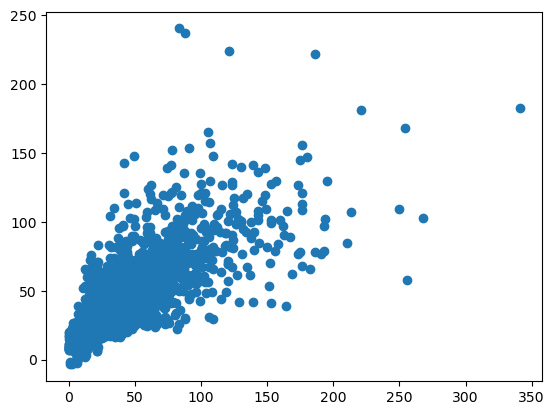

In [114]:
plt.scatter(x=y_test,y=predlr)

# RANDOM FOREST

In [117]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [118]:
predrf=rf.predict(x_test)

In [119]:
print('r2_score:',r2_score(y_test,predrf))
print('mean_squared_error:',mean_squared_error(y_test,predrf))
print('mean_absolute_error:',mean_absolute_error(y_test,predrf))

r2_score: 0.8057464598411476
mean_squared_error: 307.2958765056254
mean_absolute_error: 11.136637988087358


# SCATTER PLOT USING RANDOM FOREST CLASSIFIER

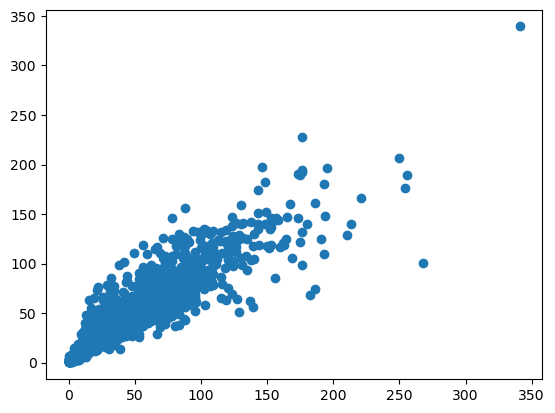

In [120]:
plt.scatter(x=y_test,y=predrf)

# DECISION TREE REGRESSOR

In [121]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [122]:
preddt=dt.predict(x_test)

In [123]:
print('r2_score:',r2_score(y_test,preddt))
print('mean_squared_error:',mean_squared_error(y_test,preddt))
print('mean_absolute_error:',mean_absolute_error(y_test,preddt))

r2_score: 0.653081077943088
mean_squared_error: 548.8021178027797
mean_absolute_error: 14.451356717405691


# SCATTER PLOT USING DECISION TREE REGRESSOR

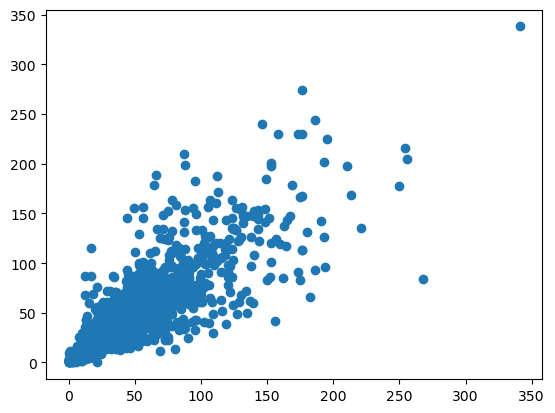

In [124]:
plt.scatter(x=y_test,y=preddt)

# KNEIGHBORS REGRESSOR

In [125]:
kn=KNeighborsRegressor()
kn.fit(x_train,y_train)

KNeighborsRegressor()

In [126]:
predkn=kn.predict(x_test)

In [127]:
print('r2_score:',r2_score(y_test,predkn))
print('mean_squared_error:',mean_squared_error(y_test,predkn))
print('mean_absolute_error:',mean_absolute_error(y_test,predkn))

r2_score: 0.8007165577615639
mean_squared_error: 315.25283917935144
mean_absolute_error: 10.606221045665123


# SCATTER PLOT USING KNEIGHBORS

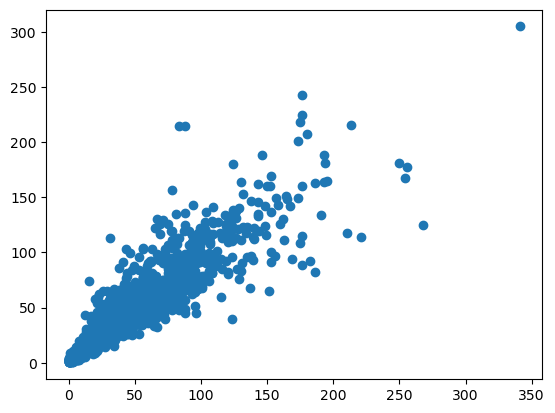

In [128]:
plt.scatter(x=y_test,y=predkn)

# ANALYSIS OF AREA VS OVERALL CRIME

# TO DO ANALYSIS OF BOTH THESE WE NEED TO UPLOAD NEW FILE AND AREA CSV AND MERGE WITH CRIME CSV

In [62]:
# Load data of crime
crime_data = pd.read_csv(r"c:\users\91991\downloads\India_Crime -Zip\India_Crime - Copy\01_District_wise_crimes_committed_IPC_2001_2012.csv")
crime_data

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,1,186,0,2,0,1,0,44,392,787
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,...,20,632,0,7,2,5,0,219,1668,3494


In [63]:
#load area csv
area_data=pd.read_csv(r'c:/users/91991/desktop/AREA.csv')
area_data

,STATE/UT,AREA(KM/SQUARE)
0,Andaman and Nicobar Islands,8249
1,Andhra Pradesh,162975
2,Arunachal Pradesh,83743
3,Assam,78348
4,Bihar,94163
5,Chandigarh,114
6,Chhattisgarh,135192
7,Delhi,1484
8,Goa,3702
9,Gujarat,196024


In [64]:
crime_data['STATE/UT'] = crime_data['STATE/UT'].str.strip().str.upper()
area_data['STATE/UT'] = area_data['STATE/UT'].str.strip().str.upper()



In [67]:
df = pd.merge(area_data,crime_data, on='STATE/UT', how='inner')
df

,STATE/UT,AREA(KM/SQUARE),DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,162975,ADILABAD,2001,101,60,17,50,0,50,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,162975,ANANTAPUR,2001,151,125,1,23,0,23,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,162975,CHITTOOR,2001,101,57,2,27,0,27,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,162975,CUDDAPAH,2001,80,53,1,20,0,20,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,162975,EAST GODAVARI,2001,82,67,1,23,0,23,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8075,WEST BENGAL,90000,SEALDAH G.R.P.,2012,19,9,2,0,0,0,...,0,62,1,14,2,0,0,0,39,657
8076,WEST BENGAL,90000,SILIGURI G.R.P.,2012,4,1,0,0,0,0,...,0,0,1,8,1,0,0,0,58,248
8077,WEST BENGAL,90000,SILIGURI_PC,2012,32,6,6,21,0,21,...,3,812,3,35,12,370,0,69,385,3023
8078,WEST BENGAL,90000,UTTAR DINAJPUR,2012,110,283,10,92,0,92,...,33,1105,9,150,5,623,0,3,1839,5212


In [69]:
df.columns

Index(['STATE/UT', 'AREA(KM/SQUARE)', 'DISTRICT', 'YEAR', 'MURDER',
       'ATTEMPT TO MURDER', 'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER',
       'RAPE', 'CUSTODIAL RAPE', 'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')

In [70]:
df.shape

(8080, 34)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8080 entries, 0 to 8079
Data columns (total 34 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             8080 non-null   object
 1   AREA(KM/SQUARE)                                      8080 non-null   int64 
 2   DISTRICT                                             8080 non-null   object
 3   YEAR                                                 8080 non-null   int64 
 4   MURDER                                               8080 non-null   int64 
 5   ATTEMPT TO MURDER                                    8080 non-null   int64 
 6   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            8080 non-null   int64 
 7   RAPE                                                 8080 non-null   int64 
 8   CUSTODIAL RAPE                                       8080 non-null   int64 
 9

In [73]:
df.isnull().sum()

STATE/UT                                               0
AREA(KM/SQUARE)                                        0
DISTRICT                                               0
YEAR                                                   0
MURDER                                                 0
ATTEMPT TO MURDER                                      0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              0
RAPE                                                   0
CUSTODIAL RAPE                                         0
OTHER RAPE                                             0
KIDNAPPING & ABDUCTION                                 0
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS            0
KIDNAPPING AND ABDUCTION OF OTHERS                     0
DACOITY                                                0
PREPARATION AND ASSEMBLY FOR DACOITY                   0
ROBBERY                                                0
BURGLARY                                               0
THEFT                          

GRAPHICAL REPRESENTATION SHOWING AREA AND TOTAL CRIME

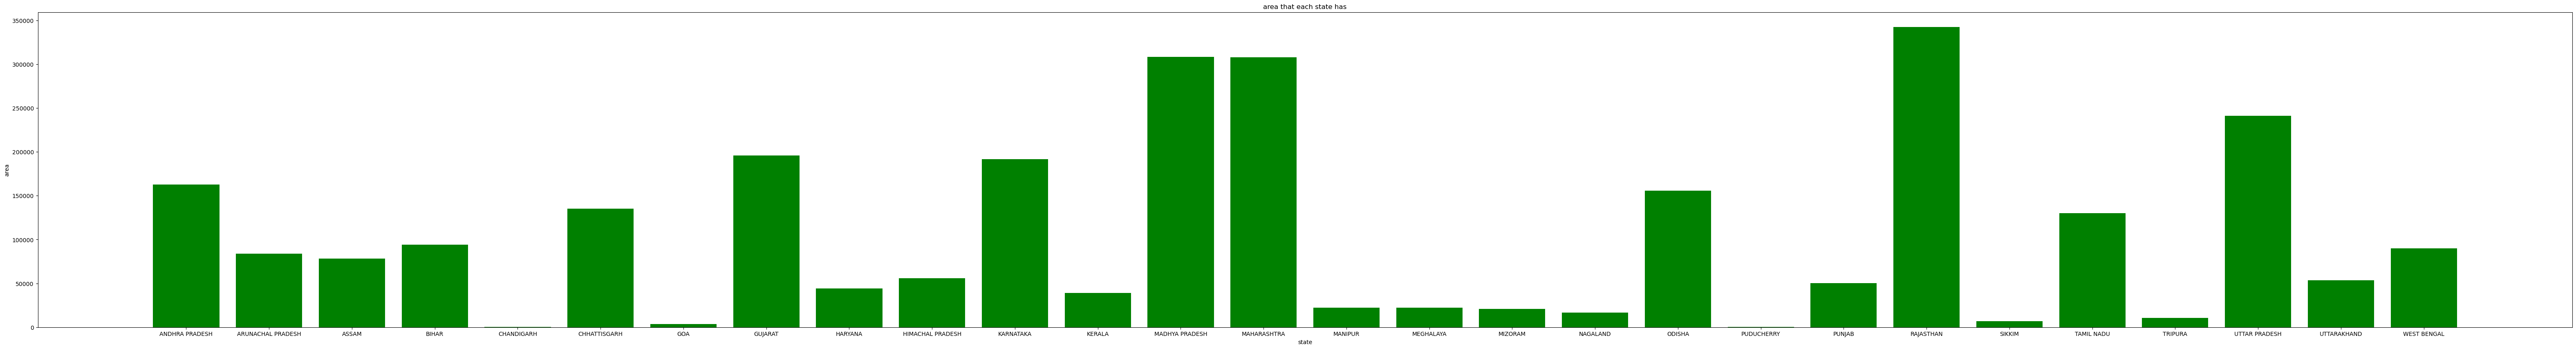

In [74]:
plt.figure(figsize=(80,10))
y=data['AREA(KM/SQUARE)']
x=data['STATE/UT']
plt.bar(x,y,color='green')
plt.xlabel('state')
plt.ylabel('area')
plt.title('area that each state has')
plt.show()

Rajasthan has the largest area(km/square)followed by Maharashtra and Madhya Pradesh

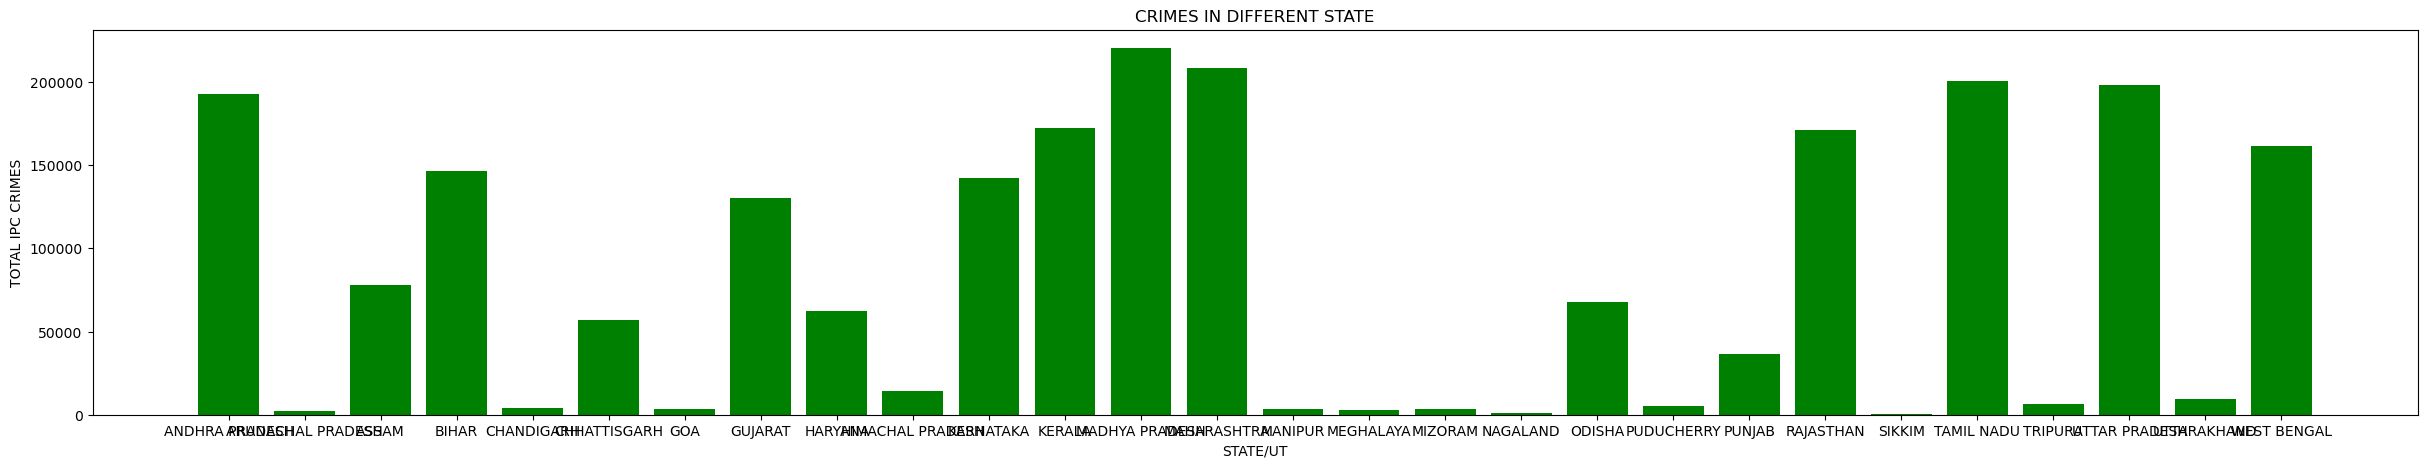

In [78]:
plt.figure(figsize=(30,5))
y=data['TOTAL IPC CRIMES']
x=data['STATE/UT']
plt.bar(x,y,color='green')
plt.xlabel('STATE/UT')
plt.ylabel('TOTAL IPC CRIMES')
plt.title('CRIMES IN DIFFERENT STATE')
plt.show()

AFTER DOING ANALYSIS OF BOTH THE GRAPHS STATES WITH HIGHEST NO OF AREA HAVE HIGHEST CRIMES ALSO

# ANALYSIS OF POPULATION VS OVERALL CRIME

HERE THE TARGET VARIABLE IS OVERALL CRIME

In [16]:
data_new

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,2000-01-INC,2011-12-INC,2001 - LIT,2011- LIT,2001 - POP,2011- POP,2001 -UNEMP,2011 -UNEMP,2001 -Poverty,2011 -Poverty
0,0,2,2001,101,60,17,50,0,50,46,...,17195,64773,60.47,67.02,76210,84581,8,12,15.77,9.20
1,0,27,2001,151,125,1,23,0,23,53,...,17195,64773,60.47,67.02,76210,84581,8,12,15.77,9.20
2,0,142,2001,101,57,2,27,0,27,59,...,17195,64773,60.47,67.02,76210,84581,8,12,15.77,9.20
3,0,156,2001,80,53,1,20,0,20,25,...,17195,64773,60.47,67.02,76210,84581,8,12,15.77,9.20
4,0,199,2001,82,67,1,23,0,23,49,...,17195,64773,60.47,67.02,76210,84581,8,12,15.77,9.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8331,28,553,2012,66,12,6,50,0,50,44,...,16583,53383,56.27,67.68,80176,91276,28,27,27.02,19.98
8332,28,607,2012,19,9,2,0,0,0,7,...,16583,53383,56.27,67.68,80176,91276,28,27,27.02,19.98
8333,28,630,2012,4,1,0,0,0,0,3,...,16583,53383,56.27,67.68,80176,91276,28,27,27.02,19.98
8334,28,631,2012,32,6,6,21,0,21,123,...,16583,53383,56.27,67.68,80176,91276,28,27,27.02,19.98


# SPLITTING DATA INTO X AND Y TAKING POPULATION AS A TARGET VARIABLE

In [31]:

x=data_new.drop(['2001 - POP','2011- POP','2001 - LIT','2011- LIT'],axis=1)
x

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,2000-01-INC,2011-12-INC,2001 -UNEMP,2011 -UNEMP,2001 -Poverty,2011 -Poverty
0,0,2,2001,101,60,17,50,0,50,46,...,0,181,1518,4154,17195,64773,8,12,15.77,9.20
1,0,27,2001,151,125,1,23,0,23,53,...,0,270,754,4125,17195,64773,8,12,15.77,9.20
2,0,142,2001,101,57,2,27,0,27,59,...,0,404,1262,5818,17195,64773,8,12,15.77,9.20
3,0,156,2001,80,53,1,20,0,20,25,...,0,233,1181,3140,17195,64773,8,12,15.77,9.20
4,0,199,2001,82,67,1,23,0,23,49,...,0,431,2313,6507,17195,64773,8,12,15.77,9.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8331,28,553,2012,66,12,6,50,0,50,44,...,0,206,565,1841,16583,53383,28,27,27.02,19.98
8332,28,607,2012,19,9,2,0,0,0,7,...,0,0,39,657,16583,53383,28,27,27.02,19.98
8333,28,630,2012,4,1,0,0,0,0,3,...,0,0,58,248,16583,53383,28,27,27.02,19.98
8334,28,631,2012,32,6,6,21,0,21,123,...,0,69,385,3023,16583,53383,28,27,27.02,19.98


In [32]:
y=data_new['2011- POP']
y

0       84581
1       84581
2       84581
3       84581
4       84581
        ...  
8331    91276
8332    91276
8333    91276
8334    91276
8335    91276
Name: 2011- POP, Length: 7553, dtype: int64

# PRINCIPAL COMPONENT ANALYSIS

In [35]:
pca=PCA(n_components=10)
xpca=pca.fit_transform(x)
x=xpca


In [36]:
pd.DataFrame(data=x)

,0,1,2,3,4,5,6,7,8,9
0,7402.982619,1281.992243,-828.414836,139.821071,-737.255352,392.390145,22.472946,19.560775,-15.615736,13.083747
1,7400.560301,1060.492352,-792.427366,984.620252,-893.918259,360.641859,66.342013,41.276241,-125.439380,19.610901
2,7424.082534,2882.963267,-1200.893378,1310.021097,-1050.135262,226.371291,174.050910,103.351532,-67.029331,-114.762441
3,7389.808767,216.689533,-589.439789,51.124970,-487.498298,231.638810,-9.213582,12.985309,-106.093323,-19.288907
4,7436.299899,3853.284796,-1402.443580,457.847315,-236.320609,124.751454,298.000922,-174.073922,-117.792815,-143.654637
...,...,...,...,...,...,...,...,...,...,...
7548,-3919.148556,-1418.918636,-1873.364728,76.572179,78.877281,-178.785041,-95.694002,-189.142352,33.258843,-7.036601
7549,-3934.048066,-2640.360681,-1604.782810,284.247215,363.147061,-289.837901,259.861112,-17.151699,38.967660,-14.248814
7550,-3939.423102,-3056.206546,-1508.650544,33.239234,212.234842,-286.619697,94.238581,41.713450,52.836434,-12.671079
7551,-3903.714151,-242.917818,-2147.574867,994.138495,100.331427,-257.318975,-4.484563,68.845480,324.766332,25.777364


# STANDARD SCALER

In [41]:
from sklearn.preprocessing import StandardScaler

In [43]:
sc=StandardScaler()

In [44]:
X=sc.fit_transform(x)
X

array([[ 0.2903167 ,  0.44814577, -0.30535298, ...,  0.10945753,
        -0.13500804,  0.11839209],
       [ 0.2902217 ,  0.3707161 , -0.29208803, ...,  0.23097221,
        -1.08450381,  0.17745495],
       [ 0.29114416,  1.00779689, -0.44264825, ...,  0.57833105,
        -0.57951151, -1.03846133],
       ...,
       [-0.15448913, -1.06835751, -0.55608727, ...,  0.23341873,
         0.45680482, -0.11465795],
       [-0.15308876, -0.08491673, -0.79159422, ...,  0.38524323,
         2.80781301,  0.23325398],
       [-0.1519402 ,  0.75678181, -0.98382979, ..., -1.11114086,
         3.61230241,  2.74917752]])

In [47]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=42)

In [48]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((6042, 10), (1511, 10), (6042,), (1511,))

In [50]:
def classify(clf,X,y):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    acc_score=(accuracy_score(y_test,pred))
    print("Accuracy Score:",acc_score)
    print("\nConfusion Matrix:\n",confusion_matrix(y_test,pred))
    class_report=classification_report(y_test,pred)
    print("\nClassification Report:\n",class_report)
    
    cv_score=(cross_val_score(clf,X,y,cv=5).mean())
    print("Cross validation Score:",cv_score)
    
    result=acc_score-cv_score
    print("\nAccuracy Score-Cross Validation Score",result)
    

# LOGISTIC REGRESSION

In [52]:
clf=LogisticRegression()
classify(clf,X,y)

Accuracy Score: 0.9642620780939775

Confusion Matrix:
 [[  8   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0  24   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0  45   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0  20   0   0   0   0   0   0   4   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0  15   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0  31   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0  34   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   0  50   0   0   0   0   0   0   0   0   0   0
    0   0   0   1   0]
 [  0   0   0   0   0   0   0   0  50   0   0   0  14   0   0   1   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  48   0   0   0   0   0   0   0   

# DECISION TREE CLASSIFIER

In [53]:
clf=DecisionTreeClassifier()
classify(clf,X,y)

Accuracy Score: 1.0

Confusion Matrix:
 [[  8   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0  24   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0  45   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0  24   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0  15   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0  31   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0  34   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   0  51   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  65   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  48   0   0   0   0   0   0   0   0
    0   0   0

# RANDOM FOREST CLASSIFIER

In [54]:
clf=RandomForestClassifier()
classify(clf,X,y)

Accuracy Score: 0.9980145598941098

Confusion Matrix:
 [[  8   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0  24   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0  45   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0  24   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0  15   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0  31   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0  34   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   0  51   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  64   0   0   0   0   0   0   1   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  48   0   0   0   0   0   0   0   

# KNEIGHBORS CLASSIFIERS

In [55]:
clf=KNeighborsClassifier()
classify(clf,X,y)

Accuracy Score: 0.9761747187293184

Confusion Matrix:
 [[  8   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0  24   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0  45   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0  24   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0  15   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0  31   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0  34   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   0  51   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  60   0   0   0   1   0   0   2   1   1
    0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  48   0   0   0   0   0   0   0   

THE SAME WAY WE CAN FIND THE ACCURACY FOR THE POP 2001

# EACH STATE CRIME REPORT

AS PER THE VARIOUS GRAPHICAL REPRESENTATION DRAWN ABOVE IT IS BEEN OBSERVED THAT MOSTLY CRIME RATE IS NEGATIVELY RELATED WITH LITERACY RATE.THE STATES IN WHICH LITERACY RATES ARE HIGH ARE HAVING COMPARITIVELY LOW CRIME RATES THAN THE STATES HAVING LOW LITERACY RATES

RAPES ARE HIGHEST IN THE STATE OF MADHYA PRADESH FOLLOWED BY MAHARASHTRA,UTTAR PRADESH,WEST BENGAL

MAXIMUM MURDERS ARE THERE IN THE STATE OF UTTAR PRADESH
LOWEST MURDERS ARE HAPPENING IN CHANDIGARH,PONDICHERRY,MIZORAM WHERE THE LITERACY RATES ARE ALSO HIGH IN THESE STATES

KIDNAPPING AND ABDUCTION IS HIGHEST IN THE STATE OF UTTAR PRADESH FOLLOWED BY WEST BENGAL,BIHAR AND ASSAM

MAXIMUM ATTEMPT TO MURDERS ARE THERE IN THE STATE OF UTTAR PRADESH FOLLOWERD BY BIHAR

HIGHEST EVER CUSTODIAL RAPES ARE HAPPENING IN ASSAM,JHARKAND

MAXIMUM CULPABLE HOMICIDE NOT AMOUNTING TO MURDER ARE HAPPENING IN THE STATES OF UTTAR PRADESH FOLLOWED BY WEST BENGAL

OTHER RAPE ARE MAXIMUM IN THE STATES OF MADHYA PRADESH,MAHARASHTRA,RAJASTHAN,UTTAR PRADESH AMD WESTBENGAL

DOWRY DEATHS ARE MAXIMUM IN THE STATES OF UTTAR PRADESH AND BIHAR

KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS ARE HIGHEST IN THE STATE OF UTTAR PRADESH

DACOITY ARE HIGHEST IN THE STATES OF BIHAR,MAHARASHTRA AND UTTARPRADESH

IF WE CAREFULLY LOOK AT THE ABOVE DATA WE CAN MAXIMUM CRIMES ARE HAPPENI NG IN THE STATES OF UTTARPRADESH,BIHAR,MAHARASHTRA,WEST BENGAL. THESE ARE THOSE STATES WHERE LITERACY RATES ARE VERY LOW

IF WE LOOK CLOSELY AT THE AREA(PER/KM) STATES WHICH HAVE THE HIGHEST NUMBER OF CRIMES HAVE THE HIGHEST AREA ALSO

# PHASE 3 SQL COONECTIVITY WITH PYTHON

OUTPUT OF 3.2 QUERY

In [89]:
#QUERY EXECUTED IN SQL AND EXPORTED INTO CSV HERE
df=pd.read_csv(r'c:/users/91991/desktop/rapes and kidnapping.csv')
df

,state,district,Year,max_rape,max_kidnapping
0,ANDHRA PRADESH,ADILABAD,2001,50,30
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30
2,ANDHRA PRADESH,CHITTOOR,2001,27,34
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26
...,...,...,...,...,...
995,KARNATAKA,MYSORE RURAL,2002,5,7
996,KARNATAKA,RAICHUR,2002,6,16
997,KARNATAKA,RAILWAYS,2002,0,0
998,KARNATAKA,SHIMOGA,2002,11,12


# OUTPUT OF QUERY 3.8.2

In [110]:
#QUERY EXECUTED IN SQL AND OUTPUT IS EXPORTED INTO CSV IN JUPYTER NOTEBOOK
df=pd.read_csv(r'c:/users/91991/downloads/outputquery.csv')
df

,state,year,district,murder
0,ANDHRA PRADESH,2001,TOTAL,2602
1,ARUNACHAL PRADESH,2001,TOTAL,83
2,ASSAM,2001,TOTAL,1356
3,BIHAR,2001,TOTAL,3643
4,CHHATTISGARH,2001,TOTAL,880
...,...,...,...,...
471,DAMAN & DIU,2012,TOTAL,3
472,DELHI UT,2012,DELHI UT TOTAL,521
473,LAKSHADWEEP,2012,LAKSHADWEEP,0
474,LAKSHADWEEP,2012,TOTAL,0


In [111]:
district_year_counts = df.groupby(['state', 'district']).year.nunique()
districts_3_or_more_years = district_year_counts[district_year_counts >= 3].index

In [112]:
districts_3_or_more_years

MultiIndex([(    'A & N ISLANDS',        'ANDAMAN'),
            (    'A & N ISLANDS',          'TOTAL'),
            (   'ANDHRA PRADESH',          'TOTAL'),
            ('ARUNACHAL PRADESH',          'TOTAL'),
            (            'ASSAM',          'TOTAL'),
            (            'BIHAR',          'TOTAL'),
            (       'CHANDIGARH',     'CHANDIGARH'),
            (       'CHANDIGARH',          'TOTAL'),
            (     'CHHATTISGARH',          'TOTAL'),
            (     'D & N HAVELI', 'D and N HAVELI'),
            (     'D & N HAVELI',          'TOTAL'),
            (      'DAMAN & DIU',          'DAMAN'),
            (      'DAMAN & DIU',          'TOTAL'),
            (         'DELHI UT', 'DELHI UT TOTAL'),
            (              'GOA',          'TOTAL'),
            (          'GUJARAT',          'TOTAL'),
            (          'HARYANA',          'TOTAL'),
            ( 'HIMACHAL PRADESH',          'TOTAL'),
            (  'JAMMU & KASHMIR',          'TO

In [113]:
filtered_df = df[df.set_index(['state', 'tdistric']).index.isin(districts_3_or_more_years)]
sorted_filtered_df = filtered_df.sort_values(by=['state', 'district', 'year', 'murder'], ascending=[True, True, False, False])
result_df = sorted_filtered_df[['state', 'district', 'year', 'murder']]
print(result_df)


             state district  year  murder
424  A & N ISLANDS  ANDAMAN  2011      14
345  A & N ISLANDS  ANDAMAN  2009      15
305  A & N ISLANDS  ANDAMAN  2008       8
186  A & N ISLANDS  ANDAMAN  2005      14
28   A & N ISLANDS  ANDAMAN  2001      13
..             ...      ...   ...     ...
185    WEST BENGAL    TOTAL  2005    1453
146    WEST BENGAL    TOTAL  2004    1425
106    WEST BENGAL    TOTAL  2003    1425
67     WEST BENGAL    TOTAL  2002    1444
27     WEST BENGAL    TOTAL  2001    1594

[474 rows x 4 columns]


ASSUMPTION
HERE IN 3.8.3 THE RESULT OF 3.8.2 IS TAKEN COLUMN MURDER WAS PRESENT IN THAT CSV. IN ASSIGNMENT 3.2 IS MENTIONED BUT IN THAT CSV(42_District_wise_crimes_committed_against_women_2001_2012.csv)THERE IS NO COLUMN CONTAINING MURDER.



# RESULT 3.8.4

GRAPHICAL REPRESENTATION

<function matplotlib.pyplot.show(close=None, block=None)>

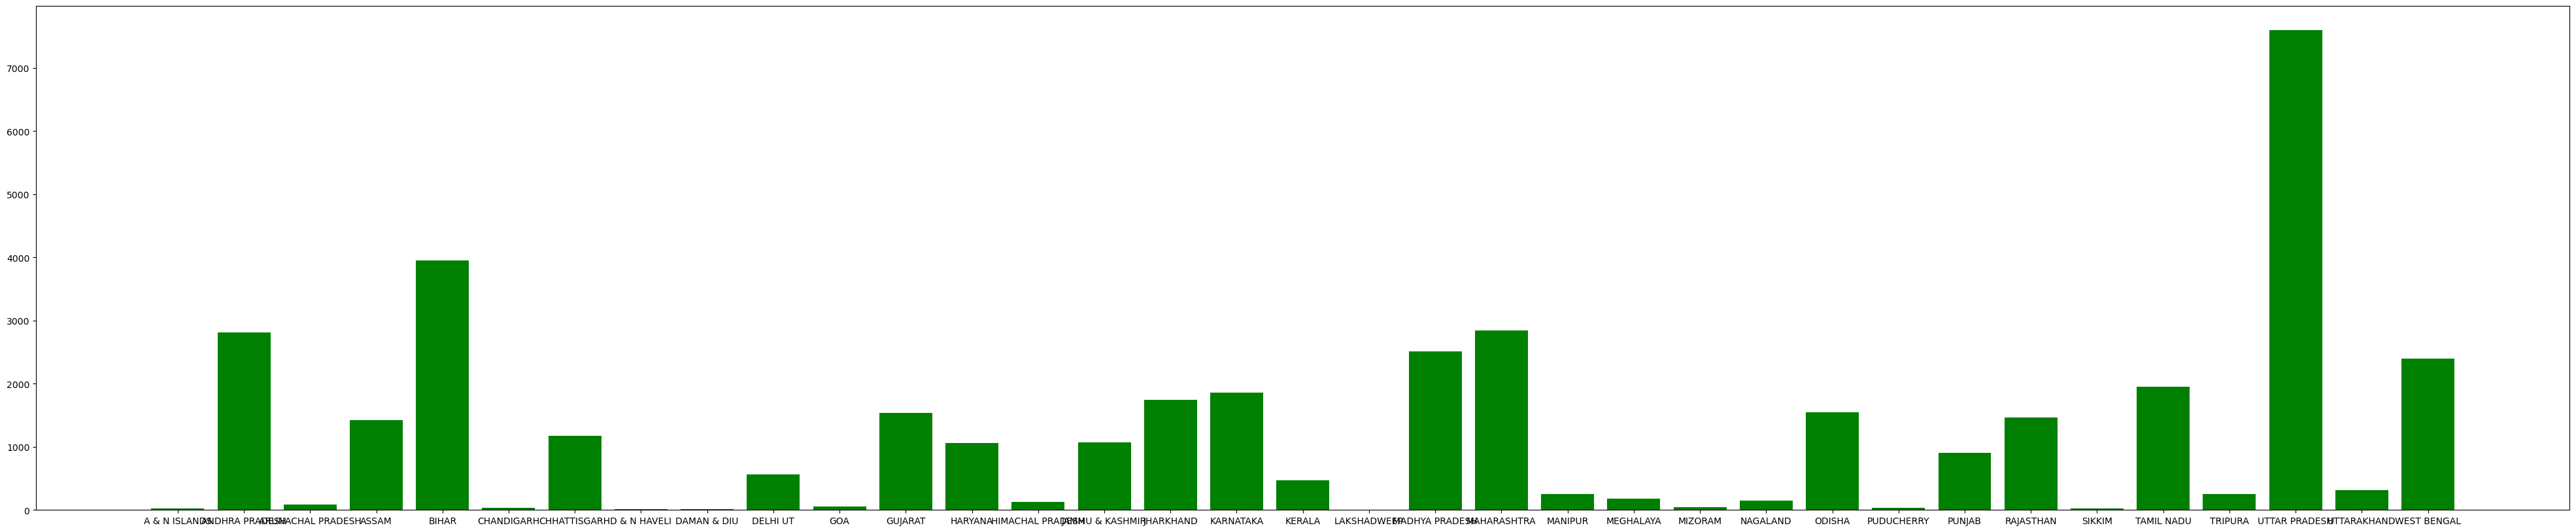

In [117]:
plt.figure(figsize=(50,10))
x=result_df['state']
y=result_df['murder']
plt.bar(x,y,color='green')
plt.show

AS WE CAN SEE FROM THE ABOVE GRAPH MAXIMUM MURDERS ARE HAPPENING IN THE STATES OF UTTAR PRADESH,FOLLOWED BY BIHAR,ANDHRA PRADESH,MADHYA PRADESH AND MAHARASHTRA

TO EXECUTE ALL THESE QUERIES FOLLOWING CSV'S HAS BEEN USED

In [ ]:
42_District_wise_crimes_committed_against_women_2001_2012.csv 

02_District_wise_crimes_committed_against_ST_2001_2012.csv
01_District_wise_crimes_committed_IPC_2001_2012.csv



# PHASE 4

# UNSUPERVISED MACHINE LEARNING(CLUSTERING)

WE ARE USING KMEANS CLUSTERING TO DIVIDE THE TOTAL IPC CRIMES INTO 3 CLUSTERS

In [99]:
#IMPORTING LIBRARIES
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [94]:
crime_data=pd.read_csv(r"c:\users\91991\downloads\India_Crime -Zip\India_Crime - Copy\01_District_wise_crimes_committed_IPC_2001_2012.csv")
crime_data.head()              

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507


In [93]:
area_data=pd.read_csv(r'c:/users/91991/desktop/AREA.csv')
area_data

,STATE/UT,AREA(KM/SQUARE)
0,Andaman and Nicobar Islands,8249
1,Andhra Pradesh,162975
2,Arunachal Pradesh,83743
3,Assam,78348
4,Bihar,94163
5,Chandigarh,114
6,Chhattisgarh,135192
7,Delhi,1484
8,Goa,3702
9,Gujarat,196024


In [95]:
crime_data['STATE/UT'] = crime_data['STATE/UT'].str.strip().str.upper()
area_data['STATE/UT'] = area_data['STATE/UT'].str.strip().str.upper()



In [96]:
df = pd.merge(area_data,crime_data, on='STATE/UT', how='inner')
df

,STATE/UT,AREA(KM/SQUARE),DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,162975,ADILABAD,2001,101,60,17,50,0,50,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,162975,ANANTAPUR,2001,151,125,1,23,0,23,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,162975,CHITTOOR,2001,101,57,2,27,0,27,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,162975,CUDDAPAH,2001,80,53,1,20,0,20,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,162975,EAST GODAVARI,2001,82,67,1,23,0,23,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8075,WEST BENGAL,90000,SEALDAH G.R.P.,2012,19,9,2,0,0,0,...,0,62,1,14,2,0,0,0,39,657
8076,WEST BENGAL,90000,SILIGURI G.R.P.,2012,4,1,0,0,0,0,...,0,0,1,8,1,0,0,0,58,248
8077,WEST BENGAL,90000,SILIGURI_PC,2012,32,6,6,21,0,21,...,3,812,3,35,12,370,0,69,385,3023
8078,WEST BENGAL,90000,UTTAR DINAJPUR,2012,110,283,10,92,0,92,...,33,1105,9,150,5,623,0,3,1839,5212


In [97]:
df=df[['AREA(KM/SQUARE)','TOTAL IPC CRIMES']]
df.head()

,AREA(KM/SQUARE),TOTAL IPC CRIMES
0,162975,4154
1,162975,4125
2,162975,5818
3,162975,3140
4,162975,6507


In [100]:
model=KMeans(n_clusters=3)
y_model=model.fit_predict(df)
y_model

array([2, 2, 2, ..., 1, 1, 1])

In [101]:
model.labels_

array([2, 2, 2, ..., 1, 1, 1])

In [102]:
pd.value_counts(y_model)

1    3250
0    2512
2    2318
dtype: int64

In [103]:
df[y_model==0]

,AREA(KM/SQUARE),TOTAL IPC CRIMES
3253,308252,2925
3254,308252,2008
3255,308252,2637
3256,308252,3361
3257,308252,13708
...,...,...
7598,240928,466
7599,240928,1821
7600,240928,2683
7601,240928,3465


In [104]:
df[y_model==1]

,AREA(KM/SQUARE),TOTAL IPC CRIMES
370,83743,163
371,83743,139
372,83743,126
373,83743,103
374,83743,190
...,...,...
8075,90000,657
8076,90000,248
8077,90000,3023
8078,90000,5212


In [105]:
df[y_model==2]

,AREA(KM/SQUARE),TOTAL IPC CRIMES
0,162975,4154
1,162975,4125
2,162975,5818
3,162975,3140
4,162975,6507
...,...,...
6653,130058,2926
6654,130058,7710
6655,130058,10486
6656,130058,5504


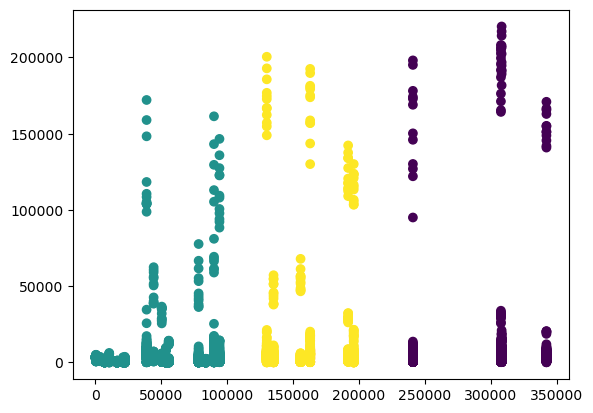

In [106]:
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=model.labels_,cmap='viridis')

In [107]:
df['group_cluster']=pd.DataFrame(data=model.labels_)
df

,AREA(KM/SQUARE),TOTAL IPC CRIMES,group_cluster
0,162975,4154,2
1,162975,4125,2
2,162975,5818,2
3,162975,3140,2
4,162975,6507,2
...,...,...,...
8075,90000,657,1
8076,90000,248,1
8077,90000,3023,1
8078,90000,5212,1


In [109]:
df.head(100)

,AREA(KM/SQUARE),TOTAL IPC CRIMES,group_cluster
0,162975,4154,2
1,162975,4125,2
2,162975,5818,2
3,162975,3140,2
4,162975,6507,2
...,...,...,...
95,162975,8544,2
96,162975,18868,2
97,162975,8048,2
98,162975,5928,2


HERE THE CLUSTER OF 3 GROUPS HAVE BEEN CREATED FOR SENSITIVE AREA, MODERATE AREA AND PEACEFUL AREA 
0 DENOTES SENSITIVE AREA
1 DENOTES MODERATE AREA
2 DENOTES PEACEFUL AREA

AS PER MY OBSERVATION LOW LIERACY RATE AND HIGH POPULATION IN THESE REGION IS THE REASON FOR HIGH CRIMES.REGIONS INCLUDE UTTAR PRADESH,MADHYA PRADESH,BIHAR,MAHARASHTRA
IN ALL THESE STATES POPULATION AND AREA BOTH ARE LARGE AND LITERACY RATE IS LOW.

TO REDUCE CRIMES GOVT SHOULD START SUCH SCHEMES IN THIS AREA WHERE INCENTIVES SHOULD BE GIVEN FOR PROMOTING EDUCATION. AUTOMATICALLY WHEN THE PEOPLE BECOME MORE AND MORE EDUCATED THERE WILL BE LESS CRIMES.POPULATION CONTROL MEASURES SHOULD ALSO BE PROMOTED IN THESE AREAS.

SAFEST DISTRICTS-SIKKIM,TAMIL NADU,PONDICHERRY,GOA,TRIPURA, NAGALAND
MOST UNSAFEST DISTRICTS-UTTAR PRADESH,MADHYA PRADESH,MAHARASHTRA,BIHAR

# OVERALL STORY

# DATA PREPARATION

FOR STARTING OF OUR ANALYSIS OF OUR DATA FIRSTLY APPROPRIATE DATA FROM VARIOUS SOURCES HAS BEEN COLLECTED WHICH INCLUDES DATA FROM KAGGLE,GOOGLE AND DEEP ANALYSIS HAS BEEN DONE ON THE DATA SHARED TO US IN INDIA_CRIME CSV.IN CASE OF AREA AND LITERACY SINCE THE DATA HAS BEEN COLLECTED FROM THE INTERNET I HAVE MADE VARIOUS ASSUMPTIONS TO MAKE DATA SUITABLE FOR MY ANALYSIS. LIKE IN AREA DATA I HAVE MATCHED AREA FROM VARIOUS SITES TO CORRESPONDING STATES/UT. TO MERGE DATA STATES/UT HAS BEEN KEPT AS A COMMON COLUMN FOR THE EASE OF WORK AND VARIOUS COLUMNS HAS BEEN DELETED. 

# EXPLORATORY DATA ANALYSIS 

VARIOUS EDA PROCESSES HAS BEEN DONE TO CLEAN THE DATA TO FIND NULL VALUES,PLOTTING OUTLIERS AND TREATING OUTLIERS BY IMPORTING ZSCORE. GRAPHICAL REPRESENTATION HAS BEEN DONE SHOWING REALTIONSHIP BETWEEN POPULATION AND LITERACY RATE,LITERACY RATES AND TOTAL IPC CRIMES,TYPES OF CRIMES IN DIFFERENT STATES, DISTRIBULATION OF POPULATION AND DISTRIBUTION OG LITERACY RATES FOR YEARS 2001 AND 2011.FROM THE GRAPHICAL REPRESENTATION IT IS OBSERVED THAT LITERACY RATE HAS NEGATIVE RELATION WITH CRIMES. LIKE STATES WHERE LITERACY RATE IS HIGH CRIME IS LOW AND VICEVERSA.POPULATION HAS BEEN INCREASING CONSIDERABLE OVER THE PERIOD OF TIME FROM 2001-2011.ON COMPARISON OF AREA AND POPULATION IT IS OBSERVED THAT STATE WITH HIGHEST AREA HAS HIGH POPULATION RATE ALSO.HOWEVER ATTENTION OF THE HIGHER AUTHORITIES SHOULD BE DRAWN TO CRIME SENSITIVE AREA MENTION ABOVE TO TAKE INITIATIVES TO INCREASE THE LITERACY RATES.IF WE FOCUS ON IMPARTING EDUCATION AUTOMATICALLY EVEN THE PROBLEM OF HIGHER POPULATION CAN BE TACKLED.MORE INITIATIVES SHOULD BE GIVEN ON EDUCATING WOMEN SO THAT CRIMES RELATING TO WOMEN SHOULD COME DOWN.ALSO ITS A GREAT SAYING IF THE WOMEN OF THE HOUSE IS EDUCATED THEN THE WHOLE HOUSE IS EDUCATED 

# MACHINE LEARNING MODELS

VARIOUS MACHINE LEARNING MODELS HAS BEEN USED FOR THE ANALYSIS OF DATA LIKE LOGISTIC REGRESSION, DECISION TREE, RANDOM FOREST CLASSIFIER,SVM, KNEIGHBORS CLASSIFIER.VARIOUS LIBRARIES HAS BEEN IMPORTED TO CHECK MEAN SQUARED ERROR,MEAN ABSOLUTE ERROR AND R2 SCORE TO CHECK THE ACCURACY OF THE DATA. BUT SINCE HERE THE DATA HAS BEEN COLLECTED FROM VARIOUS SOURCES AND WE ARE NOT SURE ABOUT THE AUTHENTICITY OF THE DATA SO THE ACCURACY OF DATA IS LOW. BUT ALL PROCESSES HAS BEEN DONE FOR THE VISUALISATION.
SINCE THE DATA IS TOO LARGE AND THERE ARE SO MANY COLUMNS IN THE DATA PRINCIPAL COMPONENT ANALYSIS HAS BEEN DONE TO REDUCE THE COLUMNS TO 10 FOR THE EASE OF OUR ANALYSIS. STANDARD SCALING TECHNIQUE HAS ALSO BEEN USED.

# UNSUPERVISED MACHINE LEARNING

FOR THIS I HAVE USED TWO COLUMNS AREA AND TOTAL IPC CRIME TO DIVE THE DATA INTO THREE CLUSTERS AS SENSITIVE AREA, MODERATE AREA AND PEACEFUL AREA AND VARIOUS CONCLUSIONS HAS BEEN DRAWN FROM THESE.

# CONCLUSIONS

HIGH LITERACY STATES HAVE LOW CRIMES.POPULATION INCREASE IS ALSO RELATED TO LITERACY RATES IN SOME OF THE STATES. FOCUS SHOULD BE MORE ON THE EDUCATION SPLY ON THE EDUCATION OF WOMEN AND CHILDREN.
